In [2]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
import catboost as cb


In [4]:
# loading the dataset
df = pd.read_csv('/content/concrete_data.csv')

In [5]:
# displaying the data
df

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [6]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# Exploratory Data Analysis on the Data

In [7]:
# short description of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
# statistic description of the dataset
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [9]:
# checking if there are missing values
df.isna().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

### The dataset does not contain any missing data

In [10]:
# to see the correlation in the data
df.corr()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
blast_furnace_slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
fly_ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarse_aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fine_aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
concrete_compressive_strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<Axes: >

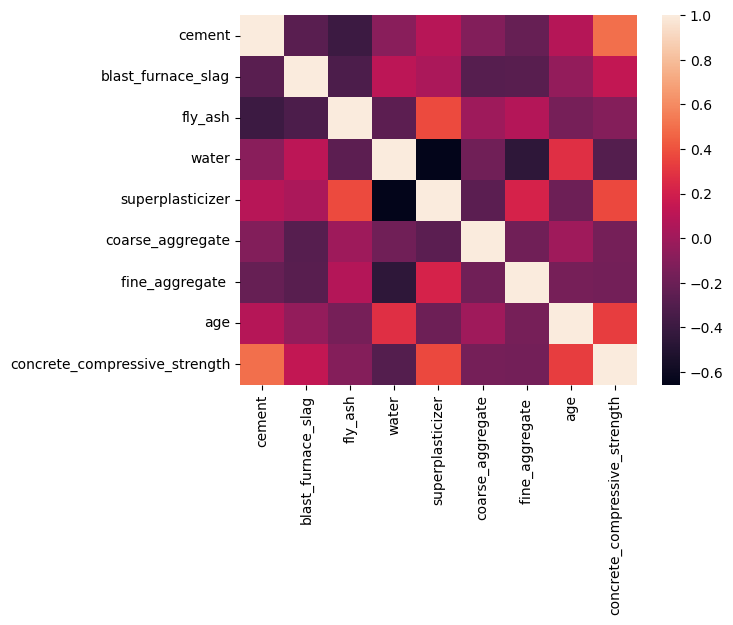

In [ ]:
sns.heatmap(df.corr())

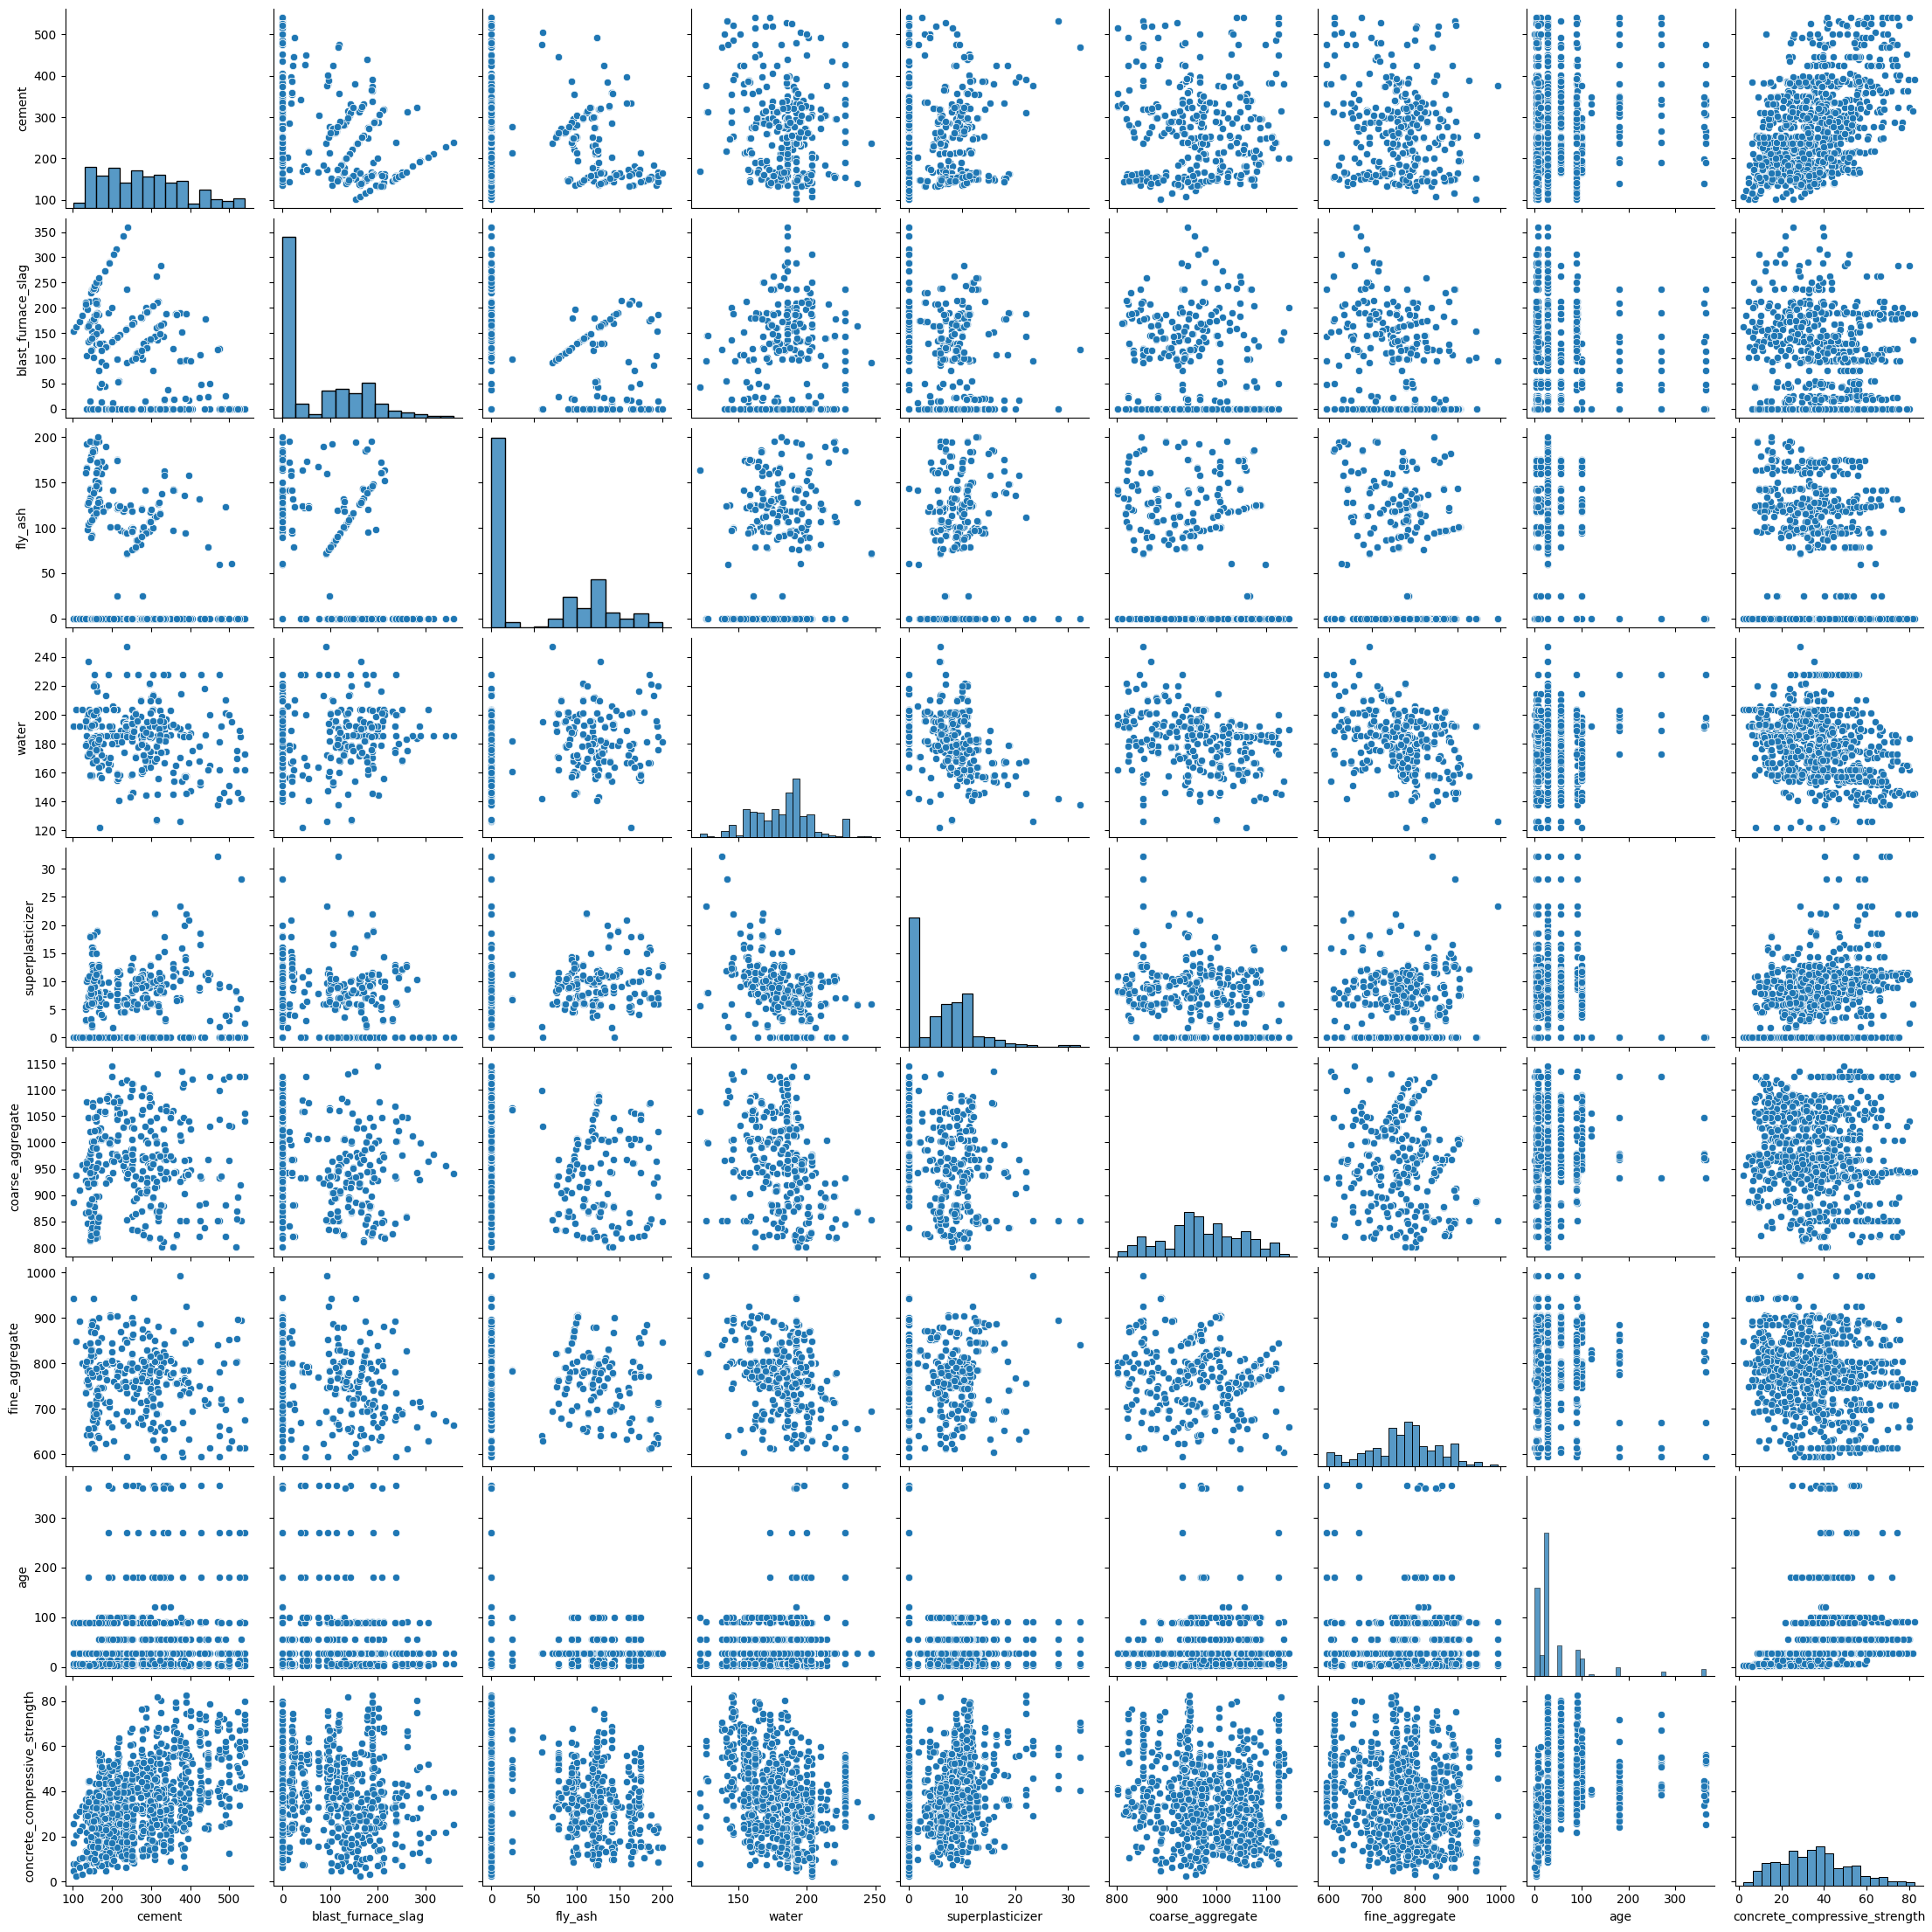

In [ ]:
sns.pairplot(df)

In [11]:
# seperating the input fetures from the label
x = df.drop(['concrete_compressive_strength'], axis='columns')

In [12]:
x

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [13]:
# label
y = df[['concrete_compressive_strength']]

In [14]:
y

,concrete_compressive_strength
0,79.99
1,61.89
2,40.27
3,41.05
4,44.30
...,...
1025,44.28
1026,31.18
1027,23.70
1028,32.77


In [15]:
# splitting the training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# using LinearRegression algorithm to build a model

linear_regression = LinearRegression()
unoptimised_model = linear_regression.fit(x_train, y_train)

In [ ]:
mean_absolute_error(unoptimised_model.predict(x_test), y_test)

7.745559243921433

## This shows that the accuracy of the unoptimsed Linear Regression Model is + or - 7.745 mpa

In [ ]:
# using RandomizedSearchCV on the LinearRegression Model

In [ ]:
LR = LinearRegression()

In [ ]:
LR.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
param_dist = {
    'copy_X': [True, False], 'fit_intercept': [True, False], 'n_jobs': [None,1,2,3,4,5], 'positive': [False, True],
}

In [ ]:
lr_grid_search_cv = RandomizedSearchCV(
    estimator=LR,
    param_distributions=param_dist,
    scoring=['r2', 'neg_mean_absolute_error'],
    refit='r2',
    cv=5,
    n_jobs=-1,
    verbose=2,

)

In [ ]:
lr_grid_search_cv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'n_jobs': [None, 1, 2, 3, 4, 5],
                                        'positive': [False, True]},
                   refit='r2', scoring=['r2', 'neg_mean_absolute_error'],
                   verbose=2)

In [ ]:
print(f'best parameters: {lr_grid_search_cv.best_params_}')

best parameters: {'positive': False, 'n_jobs': 4, 'fit_intercept': False, 'copy_X': False}


In [ ]:
print(f'best score: {lr_grid_search_cv.best_score_}')

best score: 0.5961557019204672


In [ ]:
lr_grid_search_cv.best_estimator_

LinearRegression(copy_X=False, fit_intercept=False, n_jobs=4)

In [ ]:
best_model = lr_grid_search_cv.best_estimator_

In [ ]:
result1 = best_model.predict(x_test)


In [ ]:
mean_absolute_error(result1, y_test)

7.7506165621983625

## The accuracy of the optimised model is 7.75 mpa as against 7.75 mpa for the unoptimised model
## This has shown that hyper parameter tuning using randonized search cv had no positive impact on the accuracy of the  Linear Regression model

In [ ]:
# using DecisionTreeRegressor
decision_tree_regression = DecisionTreeRegressor(random_state=42)


In [ ]:
DTModel = decision_tree_regression.fit(x_train, y_train)


In [ ]:
DT_pred = DTModel.predict(x_test)
mean_absolute_error(DT_pred, y_test)

4.293786407766991

## The unoptimised DecisionTreeModel has an accuracy of + or - 4.29 mpa

In [ ]:
# using RandomizedSearchCV with DescisionTreeModel
DTM = DecisionTreeRegressor(random_state=42)

In [ ]:
# getting the optimisable parameters for the model
DTM.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
# using the grid search for hyperparameter tuning

In [ ]:
param_dist = {
    'max_depth': [None, 1, 2, 3, 4, 5, 6],
    'max_features': [None, 1, 2,3, 4, 5, 6],
    'max_leaf_nodes': [None, 1, 2, 4, 6],
     'min_impurity_decrease': [0.0, 1 ,2, 3, 4, 5, 6],
     'min_samples_leaf': [1, 2, 3, 4, 5, 6],
     'min_samples_split': [1 , 2, 3, 4, 5, 6],
     'splitter': ['best'],
     'ccp_alpha': [0.0, 1 ,2, 3, 4, 5, 6],
     'criterion': ['squared_error']
}

In [ ]:
DT_grid_search = RandomizedSearchCV(
            estimator=DTM,
            param_distributions=param_dist,
            scoring=['r2', 'neg_mean_absolute_error'],
            refit='r2',
            cv=2,
            verbose=2,
            n_jobs=-1
)

In [ ]:
DT_optimized_model = DT_grid_search.fit(x_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END copy_X=True, fit_intercept=False, n_jobs=3, positive=True; total time=   0.1s
[CV] END copy_X=False, fit_intercept=True, n_jobs=5, positive=False; total time=   0.1s
[CV] END copy_X=True, fit_intercept=True, n_jobs=1, positive=False; total time=   0.0s
[CV] END copy_X=False, fit_intercept=False, n_jobs=2, positive=False; total time=   0.0s
[CV] END copy_X=False, fit_intercept=False, n_jobs=1, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=False, n_jobs=1, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=False, n_jobs=1, positive=True; total time=   0.0s
[CV] END copy_X=False, fit_intercept=True, n_jobs=5, positive=True; total time=   0.0s
[CV] END ccp_alpha=6, criterion=squared_error, max_depth=1, max_features=3, max_leaf_nodes=None, min_impurity_decrease=6, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   0.0s
[CV] END ccp_alpha=0.0, criterion=squared_

[CV] END copy_X=True, fit_intercept=False, n_jobs=3, positive=True; total time=   0.1s
[CV] END copy_X=True, fit_intercept=False, n_jobs=3, positive=True; total time=   0.0s
[CV] END copy_X=False, fit_intercept=False, n_jobs=4, positive=False; total time=   0.1s
[CV] END copy_X=False, fit_intercept=False, n_jobs=4, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=4, positive=True; total time=   0.1s
[CV] END copy_X=True, fit_intercept=True, n_jobs=4, positive=True; total time=   0.1s
[CV] END copy_X=True, fit_intercept=True, n_jobs=4, positive=True; total time=   0.0s
[CV] END copy_X=False, fit_intercept=False, n_jobs=4, positive=True; total time=   0.1s
[CV] END copy_X=False, fit_intercept=False, n_jobs=4, positive=True; total time=   0.0s
[CV] END copy_X=False, fit_intercept=True, n_jobs=5, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=1, positive=False; total time=   0.0s
[CV] END copy_X=False, fit_intercept=Fa

/home/austin/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
6 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "/home/austin/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/austin/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/home/austin/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/home/aus

In [ ]:
DT_optimized_model.best_params_

{'splitter': 'best',
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'min_impurity_decrease': 6,
 'max_leaf_nodes': None,
 'max_features': 4,
 'max_depth': 5,
 'criterion': 'squared_error',
 'ccp_alpha': 5}

In [ ]:
DT_optimized_model.best_score_

0.5879123392983199

In [ ]:
DT_best_optimized_model = DT_optimized_model.best_estimator_

In [ ]:
optimised_prediction = DT_best_optimized_model.predict(x_test)

In [ ]:
mean_absolute_error(optimised_prediction, y_test)

9.327123911052265

## The Optimised DecisionTreeModel had an accuracy of +- 7.01 mpa as against +- 4.29 mpa for the unoptimised DecisionTreeModel

### DecisionTreeRegressor Algorithm performed better than LinearRegression Algorithm.


In [ ]:
# using xgboost
xgboost = xgb.XGBRegressor(random_state=42)
xgboost.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
xgb_prediction = xgboost.predict(x_test)

In [ ]:
mean_absolute_error(y_test, xgb_prediction)

2.996374957538346

## The accuracy for the unoptimised xgboost model is +- 3 mpa

## Using RandomizedSearchCV with XGBoost

In [ ]:
xgb = xgb.XGBRegressor(random_state=42)

In [ ]:
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
param_distr = {
    'learning_rate': [None, 0.01, 0.05, 0.1, 0.2, 1],
    'max_depth': [None, 1, 2, 3, 4, 5, 6],
    'min_child_weight': [None, 1, 2, 3, 4, 5, 6],
    'n_estimators': [None, 20, 40, 60, 70, 100],
    'max_features': [None, 1, 2, 3, 4, 5, 6],
}

In [ ]:
randomized_search_xgb = RandomizedSearchCV(
    estimator = xgb,
    param_distributions=param_distr,
    cv =2,
    refit='r2',
    scoring=['r2', 'neg_mean_absolute_error'],
    verbose=2,
    n_jobs=2
)

[CV] END ccp_alpha=5, criterion=squared_error, max_depth=5, max_features=4, max_leaf_nodes=None, min_impurity_decrease=6, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   0.1s
[CV] END ccp_alpha=3, criterion=squared_error, max_depth=5, max_features=2, max_leaf_nodes=2, min_impurity_decrease=2, min_samples_leaf=3, min_samples_split=2, splitter=best; total time=   0.1s
[CV] END copy_X=True, fit_intercept=False, n_jobs=3, positive=True; total time=   0.1s
[CV] END copy_X=False, fit_intercept=False, n_jobs=4, positive=True; total time=   0.0s
[CV] END copy_X=False, fit_intercept=True, n_jobs=5, positive=False; total time=   0.1s
[CV] END copy_X=True, fit_intercept=True, n_jobs=1, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=1, positive=False; total time=   0.0s
[CV] END copy_X=False, fit_intercept=False, n_jobs=2, positive=False; total time=   0.0s
[CV] END copy_X=False, fit_intercept=False, n_jobs=1, positive=True; total time=   

In [ ]:
randomized_xgb_model = randomize_search_xgb.fit(x_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


/home/austin/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [16:33:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)
/home/austin/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [16:33:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)
/home/austin/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [16:33:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)
/home/austin/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [16:33:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)
/home/austin/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [16:33:50] WARNING: /workspace/src/lea

[CV] END learning_rate=0.01, max_depth=1, max_features=6, min_child_weight=None, n_estimators=60; total time=   0.3s
[CV] END learning_rate=1, max_depth=3, max_features=2, min_child_weight=4, n_estimators=100; total time=   0.8s
[CV] END learning_rate=0.2, max_depth=1, max_features=None, min_child_weight=5, n_estimators=40; total time=   0.3s
[CV] END learning_rate=0.2, max_depth=None, max_features=3, min_child_weight=None, n_estimators=40; total time=   0.3s
[CV] END learning_rate=None, max_depth=None, max_features=5, min_child_weight=3, n_estimators=20; total time=   0.3s
[CV] END learning_rate=None, max_depth=2, max_features=5, min_child_weight=3, n_estimators=20; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, max_features=1, min_child_weight=6, n_estimators=20; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, max_features=4, min_child_weight=None, n_estimators=None; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=1, max_features=6, min_child_weig

In [ ]:
randomized_xgb_model.best_score_

0.8837225914902445

In [ ]:
randomized_xgb_model.best_params_

{'n_estimators': 70,
 'min_child_weight': 5,
 'max_features': 1,
 'max_depth': 5,
 'learning_rate': 0.1}

In [ ]:
best_randomized_xgb_model = randomized_xgb_model.best_estimator_

In [ ]:
mean_absolute_error(y_test, best_randomized_xgb_model.predict(x_test))

3.5351161425321997

## This shows that the unoptimized XGBoost Model has a better accuracy of +- 3 mpa as compared to that of the optimized unsing RandomizedSearchCV that gave of +- 3.55 mpa

In [ ]:
# using Catboopst Algorithm

In [ ]:
catboost = cb.CatBoostRegressor()

In [ ]:
catboost.fit(x_train, y_train)

Learning rate set to 0.03971
0:	learn: 16.4315186	total: 57.8ms	remaining: 57.7s
1:	learn: 16.0294385	total: 63.6ms	remaining: 31.8s
2:	learn: 15.7061823	total: 69.8ms	remaining: 23.2s
3:	learn: 15.3291547	total: 78.9ms	remaining: 19.6s
4:	learn: 14.9924500	total: 84.9ms	remaining: 16.9s
5:	learn: 14.6325291	total: 89.6ms	remaining: 14.8s
6:	learn: 14.3058608	total: 94.2ms	remaining: 13.4s
7:	learn: 14.0119631	total: 100ms	remaining: 12.4s
8:	learn: 13.7019211	total: 106ms	remaining: 11.7s
9:	learn: 13.4094500	total: 111ms	remaining: 11s
10:	learn: 13.1217704	total: 115ms	remaining: 10.4s
11:	learn: 12.8457113	total: 121ms	remaining: 9.99s
12:	learn: 12.5745612	total: 125ms	remaining: 9.52s
13:	learn: 12.3228472	total: 130ms	remaining: 9.14s
14:	learn: 12.0663170	total: 133ms	remaining: 8.76s
15:	learn: 11.8265055	total: 137ms	remaining: 8.44s
16:	learn: 11.5957395	total: 141ms	remaining: 8.18s
17:	learn: 11.3643152	total: 146ms	remaining: 7.94s
18:	learn: 11.1587278	total: 149ms	remai

197:	learn: 3.9287341	total: 941ms	remaining: 3.81s
198:	learn: 3.9240470	total: 946ms	remaining: 3.81s
199:	learn: 3.9167906	total: 950ms	remaining: 3.8s
200:	learn: 3.9129038	total: 955ms	remaining: 3.8s
201:	learn: 3.9074997	total: 960ms	remaining: 3.79s
202:	learn: 3.8995898	total: 964ms	remaining: 3.79s
203:	learn: 3.8932819	total: 969ms	remaining: 3.78s
204:	learn: 3.8863968	total: 973ms	remaining: 3.77s
205:	learn: 3.8739376	total: 978ms	remaining: 3.77s
206:	learn: 3.8682561	total: 983ms	remaining: 3.77s
207:	learn: 3.8619496	total: 988ms	remaining: 3.76s
208:	learn: 3.8548972	total: 993ms	remaining: 3.76s
209:	learn: 3.8436891	total: 998ms	remaining: 3.75s
210:	learn: 3.8404354	total: 1s	remaining: 3.75s
211:	learn: 3.8329471	total: 1.01s	remaining: 3.74s
212:	learn: 3.8224932	total: 1.01s	remaining: 3.74s
213:	learn: 3.8086362	total: 1.02s	remaining: 3.74s
214:	learn: 3.8010349	total: 1.02s	remaining: 3.74s
215:	learn: 3.7979271	total: 1.03s	remaining: 3.73s
216:	learn: 3.790

364:	learn: 3.0437732	total: 1.7s	remaining: 2.96s
365:	learn: 3.0393121	total: 1.71s	remaining: 2.96s
366:	learn: 3.0353482	total: 1.72s	remaining: 2.96s
367:	learn: 3.0268773	total: 1.72s	remaining: 2.96s
368:	learn: 3.0264044	total: 1.73s	remaining: 2.95s
369:	learn: 3.0235292	total: 1.73s	remaining: 2.95s
370:	learn: 3.0228797	total: 1.74s	remaining: 2.94s
371:	learn: 3.0189625	total: 1.74s	remaining: 2.94s
372:	learn: 3.0173442	total: 1.75s	remaining: 2.94s
373:	learn: 3.0086203	total: 1.75s	remaining: 2.93s
374:	learn: 3.0047926	total: 1.76s	remaining: 2.93s
375:	learn: 3.0014151	total: 1.76s	remaining: 2.93s
376:	learn: 2.9992678	total: 1.77s	remaining: 2.92s
377:	learn: 2.9940255	total: 1.78s	remaining: 2.92s
378:	learn: 2.9905162	total: 1.78s	remaining: 2.92s
379:	learn: 2.9851029	total: 1.79s	remaining: 2.92s
380:	learn: 2.9814136	total: 1.79s	remaining: 2.92s
381:	learn: 2.9774829	total: 1.8s	remaining: 2.91s
382:	learn: 2.9748825	total: 1.8s	remaining: 2.91s
383:	learn: 2.9

561:	learn: 2.4860700	total: 2.65s	remaining: 2.07s
562:	learn: 2.4857809	total: 2.66s	remaining: 2.06s
563:	learn: 2.4836582	total: 2.66s	remaining: 2.06s
564:	learn: 2.4818229	total: 2.67s	remaining: 2.05s
565:	learn: 2.4790272	total: 2.67s	remaining: 2.05s
566:	learn: 2.4770757	total: 2.68s	remaining: 2.04s
567:	learn: 2.4741242	total: 2.68s	remaining: 2.04s
568:	learn: 2.4710613	total: 2.69s	remaining: 2.03s
569:	learn: 2.4681623	total: 2.69s	remaining: 2.03s
570:	learn: 2.4655243	total: 2.69s	remaining: 2.02s
571:	learn: 2.4629135	total: 2.7s	remaining: 2.02s
572:	learn: 2.4619005	total: 2.7s	remaining: 2.02s
573:	learn: 2.4594500	total: 2.71s	remaining: 2.01s
574:	learn: 2.4572372	total: 2.71s	remaining: 2.01s
575:	learn: 2.4544637	total: 2.72s	remaining: 2s
576:	learn: 2.4528088	total: 2.73s	remaining: 2s
577:	learn: 2.4519176	total: 2.73s	remaining: 1.99s
578:	learn: 2.4502298	total: 2.73s	remaining: 1.99s
579:	learn: 2.4483362	total: 2.74s	remaining: 1.98s
580:	learn: 2.446468

758:	learn: 2.1484609	total: 3.61s	remaining: 1.15s
759:	learn: 2.1455815	total: 3.62s	remaining: 1.14s
760:	learn: 2.1440474	total: 3.62s	remaining: 1.14s
761:	learn: 2.1425446	total: 3.63s	remaining: 1.13s
762:	learn: 2.1409895	total: 3.63s	remaining: 1.13s
763:	learn: 2.1399896	total: 3.64s	remaining: 1.12s
764:	learn: 2.1386531	total: 3.64s	remaining: 1.12s
765:	learn: 2.1377866	total: 3.65s	remaining: 1.11s
766:	learn: 2.1361025	total: 3.65s	remaining: 1.11s
767:	learn: 2.1344644	total: 3.66s	remaining: 1.1s
768:	learn: 2.1332585	total: 3.66s	remaining: 1.1s
769:	learn: 2.1317359	total: 3.67s	remaining: 1.09s
770:	learn: 2.1300755	total: 3.67s	remaining: 1.09s
771:	learn: 2.1291292	total: 3.68s	remaining: 1.09s
772:	learn: 2.1279718	total: 3.68s	remaining: 1.08s
773:	learn: 2.1265935	total: 3.69s	remaining: 1.08s
774:	learn: 2.1252415	total: 3.69s	remaining: 1.07s
775:	learn: 2.1244895	total: 3.7s	remaining: 1.07s
776:	learn: 2.1227802	total: 3.7s	remaining: 1.06s
777:	learn: 2.12

934:	learn: 1.9398708	total: 4.36s	remaining: 303ms
935:	learn: 1.9387631	total: 4.37s	remaining: 299ms
936:	learn: 1.9377562	total: 4.37s	remaining: 294ms
937:	learn: 1.9358898	total: 4.38s	remaining: 289ms
938:	learn: 1.9344233	total: 4.38s	remaining: 285ms
939:	learn: 1.9342223	total: 4.39s	remaining: 280ms
940:	learn: 1.9337166	total: 4.39s	remaining: 275ms
941:	learn: 1.9331261	total: 4.39s	remaining: 271ms
942:	learn: 1.9324743	total: 4.4s	remaining: 266ms
943:	learn: 1.9314031	total: 4.41s	remaining: 261ms
944:	learn: 1.9302003	total: 4.41s	remaining: 257ms
945:	learn: 1.9298457	total: 4.41s	remaining: 252ms
946:	learn: 1.9293179	total: 4.42s	remaining: 247ms
947:	learn: 1.9283820	total: 4.42s	remaining: 243ms
948:	learn: 1.9282742	total: 4.43s	remaining: 238ms
949:	learn: 1.9278500	total: 4.43s	remaining: 233ms
950:	learn: 1.9266425	total: 4.44s	remaining: 229ms
951:	learn: 1.9266158	total: 4.44s	remaining: 224ms
952:	learn: 1.9254609	total: 4.45s	remaining: 219ms
953:	learn: 1

In [ ]:
prediction = catboost.predict(x_test)

In [ ]:
mean_absolute_error(prediction, y_test)

2.717712847344756

## The accuracy for the unoptimise catboost model is +- 2.72 mpa

## Using RandomizedSearchCV with catboost for parameter optimization

In [ ]:
catboost_model = cb.CatBoostRegressor()

In [ ]:
catboost_model.get_params()

{'loss_function': 'RMSE'}

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.1s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=1, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=1, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=1, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=1, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=1, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=2, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=2, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=2, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=Tr

[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.1s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=False; total time=   0.1s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=None, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=1, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=1, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=1, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=1, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=1, positive=True; total time=   0.0s
[CV] END copy_X=True, fit_intercept=True, n_jobs=2, positive=False; total time=   0.0s
[CV] END copy_X=True, fit_intercep

In [ ]:
param_grid = {
    'learning_rate': [0.05, 0.01, 0.1, 0.2, 0.3, 1],
    'depth': [1, 2, 3, 6, 8, 10],
    'iterations': [50, 150, 200],
}

In [ ]:
catboost_grid_search_model = GridSearchCV(
    estimator=catboost_model,
    param_grid = param_grid,
    cv=2,
    refit='r2',
    n_jobs=-1,
    scoring=['r2', 'neg_mean_absolute_error'],
    verbose=2
)

142:	learn: 0.6421021	total: 15.1s	remaining: 6.04s
143:	learn: 0.6403009	total: 15.3s	remaining: 5.93s
144:	learn: 0.6386361	total: 15.4s	remaining: 5.84s
145:	learn: 0.6378167	total: 15.4s	remaining: 5.71s
146:	learn: 0.6367481	total: 15.6s	remaining: 5.61s
147:	learn: 0.6364952	total: 15.7s	remaining: 5.51s
148:	learn: 0.6354202	total: 15.8s	remaining: 5.41s
149:	learn: 0.6342519	total: 16s	remaining: 5.32s
150:	learn: 0.6327437	total: 16.1s	remaining: 5.24s
151:	learn: 0.6316438	total: 16.3s	remaining: 5.13s
152:	learn: 0.6288177	total: 16.4s	remaining: 5.04s
153:	learn: 0.6280272	total: 16.5s	remaining: 4.93s
154:	learn: 0.6258940	total: 16.6s	remaining: 4.83s
155:	learn: 0.6252791	total: 16.8s	remaining: 4.73s
156:	learn: 0.6233456	total: 16.9s	remaining: 4.63s
157:	learn: 0.6224618	total: 17s	remaining: 4.52s
158:	learn: 0.6216374	total: 17.1s	remaining: 4.42s
159:	learn: 0.6202535	total: 17.3s	remaining: 4.32s
160:	learn: 0.6201967	total: 17.3s	remaining: 4.19s
161:	learn: 0.61

In [ ]:
catboost_grid_search_model.fit(x_train, y_train)

Fitting 2 folds for each of 108 candidates, totalling 216 fits
0:	learn: 17.5396413	total: 57.7ms	remaining: 2.83s
1:	learn: 17.4966304	total: 58.4ms	remaining: 1.4s
2:	learn: 17.4495427	total: 59.1ms	remaining: 927ms
3:	learn: 17.4205117	total: 59.8ms	remaining: 688ms
4:	learn: 17.3745977	total: 69ms	remaining: 621ms
5:	learn: 17.3294627	total: 69.7ms	remaining: 511ms
6:	learn: 17.2850953	total: 70.5ms	remaining: 433ms
7:	learn: 17.2458489	total: 71.2ms	remaining: 374ms
8:	learn: 17.2021481	total: 71.9ms	remaining: 328ms
9:	learn: 17.1703165	total: 72.6ms	remaining: 290ms
10:	learn: 17.1272755	total: 86.9ms	remaining: 308ms
11:	learn: 17.0849703	total: 89.5ms	remaining: 283ms
12:	learn: 17.0433899	total: 90.1ms	remaining: 256ms
13:	learn: 17.0025233	total: 90.6ms	remaining: 233ms
14:	learn: 16.9659421	total: 91.2ms	remaining: 213ms
15:	learn: 16.9263489	total: 91.7ms	remaining: 195ms
16:	learn: 16.8899230	total: 94ms	remaining: 183ms
17:	learn: 16.8509273	total: 95.4ms	remaining: 170m

0:	learn: 17.3678627	total: 49.7ms	remaining: 2.43s
1:	learn: 17.1705685	total: 50.5ms	remaining: 1.21s
2:	learn: 16.9637291	total: 51.3ms	remaining: 803ms
3:	learn: 16.8022588	total: 52ms	remaining: 598ms
4:	learn: 16.6395748	total: 52.8ms	remaining: 475ms
5:	learn: 16.4476957	total: 56ms	remaining: 411ms
6:	learn: 16.2918867	total: 57.7ms	remaining: 355ms
7:	learn: 16.1112818	total: 59.1ms	remaining: 311ms
8:	learn: 15.9390218	total: 60.6ms	remaining: 276ms
9:	learn: 15.8064332	total: 61.2ms	remaining: 245ms
10:	learn: 15.6464549	total: 66.5ms	remaining: 236ms
11:	learn: 15.5003778	total: 67.1ms	remaining: 213ms
12:	learn: 15.3670964	total: 87.1ms	remaining: 248ms
13:	learn: 15.2685868	total: 87.8ms	remaining: 226ms
14:	learn: 15.1533678	total: 88.3ms	remaining: 206ms
15:	learn: 15.0127995	total: 89ms	remaining: 189ms
16:	learn: 14.8673016	total: 89.6ms	remaining: 174ms
17:	learn: 14.7510985	total: 90.9ms	remaining: 162ms
18:	learn: 14.6353380	total: 93.3ms	remaining: 152ms
19:	learn

1:	learn: 16.0318217	total: 2.85ms	remaining: 211ms
2:	learn: 15.9956691	total: 10ms	remaining: 491ms
3:	learn: 15.9609423	total: 10.7ms	remaining: 390ms
4:	learn: 15.9256122	total: 11.3ms	remaining: 328ms
5:	learn: 15.8908945	total: 11.9ms	remaining: 286ms
6:	learn: 15.8571611	total: 12.5ms	remaining: 256ms
7:	learn: 15.8311472	total: 60.8ms	remaining: 1.08s
8:	learn: 15.7971471	total: 61.4ms	remaining: 961ms
9:	learn: 15.7778179	total: 61.9ms	remaining: 866ms
10:	learn: 15.7444409	total: 62.4ms	remaining: 789ms
11:	learn: 15.7116456	total: 62.9ms	remaining: 724ms
12:	learn: 15.6794229	total: 63.5ms	remaining: 669ms
13:	learn: 15.6600386	total: 64.1ms	remaining: 623ms
14:	learn: 15.6275564	total: 65.9ms	remaining: 593ms
15:	learn: 15.5956416	total: 66.9ms	remaining: 560ms
16:	learn: 15.5659924	total: 67.7ms	remaining: 530ms
17:	learn: 15.5345694	total: 68.3ms	remaining: 501ms
18:	learn: 15.5089710	total: 68.9ms	remaining: 475ms
19:	learn: 15.4777580	total: 69.7ms	remaining: 453ms
20:	

1:	learn: 17.4966304	total: 1.68ms	remaining: 124ms
2:	learn: 17.4495427	total: 24ms	remaining: 1.18s
3:	learn: 17.4205117	total: 24.9ms	remaining: 909ms
4:	learn: 17.3745977	total: 25.7ms	remaining: 744ms
5:	learn: 17.3294627	total: 26.4ms	remaining: 633ms
6:	learn: 17.2850953	total: 34.9ms	remaining: 712ms
7:	learn: 17.2458489	total: 35.6ms	remaining: 632ms
8:	learn: 17.2021481	total: 37.8ms	remaining: 592ms
9:	learn: 17.1703165	total: 42.5ms	remaining: 595ms
10:	learn: 17.1272755	total: 43.1ms	remaining: 545ms
11:	learn: 17.0849703	total: 43.6ms	remaining: 502ms
12:	learn: 17.0433899	total: 55ms	remaining: 580ms
13:	learn: 17.0025233	total: 55.6ms	remaining: 540ms
14:	learn: 16.9659421	total: 56.1ms	remaining: 505ms
15:	learn: 16.9263489	total: 56.7ms	remaining: 475ms
16:	learn: 16.8899230	total: 57.3ms	remaining: 448ms
17:	learn: 16.8509273	total: 57.8ms	remaining: 424ms
18:	learn: 16.8126058	total: 58.4ms	remaining: 403ms
19:	learn: 16.7805283	total: 58.9ms	remaining: 383ms
20:	le

4:	learn: 15.8030668	total: 3.94ms	remaining: 114ms
5:	learn: 15.5674536	total: 11.8ms	remaining: 284ms
6:	learn: 15.2763621	total: 12.4ms	remaining: 253ms
7:	learn: 14.9810500	total: 12.9ms	remaining: 229ms
8:	learn: 14.6892944	total: 13.5ms	remaining: 211ms
9:	learn: 14.4285275	total: 14ms	remaining: 196ms
10:	learn: 14.1780046	total: 17.2ms	remaining: 217ms
11:	learn: 13.9627815	total: 17.8ms	remaining: 205ms
12:	learn: 13.7485988	total: 18.5ms	remaining: 195ms
13:	learn: 13.5608917	total: 19.3ms	remaining: 187ms
14:	learn: 13.3670643	total: 20ms	remaining: 180ms
15:	learn: 13.1798644	total: 24.4ms	remaining: 204ms
16:	learn: 13.0897064	total: 25ms	remaining: 196ms
17:	learn: 12.9190635	total: 28.4ms	remaining: 208ms
18:	learn: 12.7452766	total: 35.6ms	remaining: 246ms
19:	learn: 12.5950394	total: 36.3ms	remaining: 236ms
20:	learn: 12.4005932	total: 36.9ms	remaining: 226ms
21:	learn: 12.2573226	total: 37.4ms	remaining: 218ms
22:	learn: 12.1372047	total: 37.9ms	remaining: 209ms
23:	l

12:	learn: 9.9722999	total: 35.2ms	remaining: 371ms
13:	learn: 9.7853844	total: 35.9ms	remaining: 348ms
14:	learn: 9.5757188	total: 36.6ms	remaining: 329ms
15:	learn: 9.3437723	total: 37.2ms	remaining: 311ms
16:	learn: 9.1597050	total: 37.7ms	remaining: 295ms
17:	learn: 8.9457441	total: 38.2ms	remaining: 280ms
18:	learn: 8.7874197	total: 38.9ms	remaining: 268ms
19:	learn: 8.6860316	total: 39.4ms	remaining: 256ms
20:	learn: 8.4907273	total: 40ms	remaining: 246ms
21:	learn: 8.3024968	total: 40.5ms	remaining: 236ms
22:	learn: 8.1712101	total: 41.1ms	remaining: 227ms
23:	learn: 8.0469717	total: 62.8ms	remaining: 330ms
24:	learn: 7.9328750	total: 63.4ms	remaining: 317ms
25:	learn: 7.7822897	total: 63.9ms	remaining: 305ms
26:	learn: 7.6890651	total: 64.5ms	remaining: 294ms
27:	learn: 7.6119569	total: 65.2ms	remaining: 284ms
28:	learn: 7.5074243	total: 65.7ms	remaining: 274ms
29:	learn: 7.4180803	total: 66.3ms	remaining: 265ms
30:	learn: 7.3327997	total: 67.1ms	remaining: 258ms
31:	learn: 7.2

10:	learn: 7.4169804	total: 16.9ms	remaining: 214ms
11:	learn: 7.2428010	total: 17.7ms	remaining: 203ms
12:	learn: 7.0959360	total: 18.2ms	remaining: 192ms
13:	learn: 6.9857649	total: 18.8ms	remaining: 182ms
14:	learn: 6.8480403	total: 19.3ms	remaining: 174ms
15:	learn: 6.7459861	total: 25.8ms	remaining: 216ms
16:	learn: 6.5599160	total: 26.4ms	remaining: 207ms
17:	learn: 6.4787396	total: 55.5ms	remaining: 407ms
18:	learn: 6.4014377	total: 56.1ms	remaining: 387ms
19:	learn: 6.3089079	total: 57.7ms	remaining: 375ms
20:	learn: 6.2110478	total: 58.3ms	remaining: 358ms
21:	learn: 6.1359720	total: 58.8ms	remaining: 342ms
22:	learn: 6.0099151	total: 59.4ms	remaining: 328ms
23:	learn: 5.9492849	total: 60ms	remaining: 315ms
24:	learn: 5.8853547	total: 60.6ms	remaining: 303ms
25:	learn: 5.8153653	total: 61.1ms	remaining: 292ms
26:	learn: 5.7417715	total: 65.4ms	remaining: 298ms
27:	learn: 5.7051957	total: 66ms	remaining: 288ms
28:	learn: 5.6585540	total: 66.5ms	remaining: 278ms
29:	learn: 5.618

16:	learn: 16.8899230	total: 78.7ms	remaining: 847ms
17:	learn: 16.8509273	total: 79.6ms	remaining: 805ms
18:	learn: 16.8126058	total: 80.1ms	remaining: 763ms
19:	learn: 16.7805283	total: 80.6ms	remaining: 726ms
20:	learn: 16.7428956	total: 81.2ms	remaining: 692ms
21:	learn: 16.7053484	total: 81.8ms	remaining: 662ms
22:	learn: 16.6740340	total: 82.9ms	remaining: 638ms
23:	learn: 16.6485028	total: 86.1ms	remaining: 631ms
24:	learn: 16.6149365	total: 86.7ms	remaining: 607ms
25:	learn: 16.5790766	total: 87.2ms	remaining: 584ms
26:	learn: 16.5421209	total: 87.8ms	remaining: 563ms
27:	learn: 16.5058069	total: 88.4ms	remaining: 543ms
28:	learn: 16.4695998	total: 88.9ms	remaining: 524ms
29:	learn: 16.4365900	total: 89.4ms	remaining: 507ms
30:	learn: 16.4040050	total: 117ms	remaining: 640ms
31:	learn: 16.3714937	total: 118ms	remaining: 619ms
32:	learn: 16.3367327	total: 118ms	remaining: 600ms
33:	learn: 16.3052944	total: 119ms	remaining: 581ms
34:	learn: 16.2838744	total: 120ms	remaining: 564m

167:	learn: 7.4257735	total: 294ms	remaining: 56ms
168:	learn: 7.4078733	total: 322ms	remaining: 59.2ms
169:	learn: 7.3928604	total: 323ms	remaining: 57ms
170:	learn: 7.3746684	total: 324ms	remaining: 55ms
171:	learn: 7.3571307	total: 325ms	remaining: 52.9ms
172:	learn: 7.3407002	total: 344ms	remaining: 53.7ms
173:	learn: 7.3257584	total: 345ms	remaining: 51.5ms
174:	learn: 7.3090246	total: 345ms	remaining: 49.3ms
175:	learn: 7.2921226	total: 346ms	remaining: 47.2ms
176:	learn: 7.2784451	total: 347ms	remaining: 45.1ms
177:	learn: 7.2625246	total: 348ms	remaining: 43ms
178:	learn: 7.2474185	total: 369ms	remaining: 43.3ms
179:	learn: 7.2300429	total: 370ms	remaining: 41.1ms
180:	learn: 7.2137467	total: 370ms	remaining: 38.9ms
181:	learn: 7.1987574	total: 371ms	remaining: 36.7ms
182:	learn: 7.1858830	total: 391ms	remaining: 36.3ms
183:	learn: 7.1685013	total: 392ms	remaining: 34ms
184:	learn: 7.1566434	total: 394ms	remaining: 31.9ms
185:	learn: 7.1427381	total: 395ms	remaining: 29.7ms
186

126:	learn: 5.2702609	total: 124ms	remaining: 71.4ms
127:	learn: 5.2616935	total: 125ms	remaining: 70.3ms
128:	learn: 5.2541973	total: 126ms	remaining: 69.2ms
129:	learn: 5.2451053	total: 127ms	remaining: 68.1ms
130:	learn: 5.2438037	total: 127ms	remaining: 67ms
131:	learn: 5.2383283	total: 128ms	remaining: 66ms
132:	learn: 5.2303735	total: 129ms	remaining: 64.9ms
133:	learn: 5.2224292	total: 130ms	remaining: 63.8ms
134:	learn: 5.2176693	total: 130ms	remaining: 62.7ms
135:	learn: 5.2096107	total: 134ms	remaining: 62.9ms
136:	learn: 5.2011722	total: 134ms	remaining: 61.8ms
137:	learn: 5.1965667	total: 135ms	remaining: 60.8ms
138:	learn: 5.1892806	total: 136ms	remaining: 59.7ms
139:	learn: 5.1842261	total: 137ms	remaining: 58.6ms
140:	learn: 5.1759028	total: 138ms	remaining: 57.5ms
141:	learn: 5.1682597	total: 138ms	remaining: 56.5ms
142:	learn: 5.1640194	total: 139ms	remaining: 55.4ms
143:	learn: 5.1570089	total: 140ms	remaining: 54.4ms
144:	learn: 5.1490065	total: 141ms	remaining: 53.3

81:	learn: 5.1896508	total: 67.1ms	remaining: 96.5ms
82:	learn: 5.1735452	total: 67.7ms	remaining: 95.4ms
83:	learn: 5.1640183	total: 68.3ms	remaining: 94.4ms
84:	learn: 5.1557561	total: 68.8ms	remaining: 93.1ms
85:	learn: 5.1415493	total: 72ms	remaining: 95.5ms
86:	learn: 5.1274694	total: 72.6ms	remaining: 94.3ms
87:	learn: 5.1097537	total: 73.2ms	remaining: 93.2ms
88:	learn: 5.0978889	total: 73.8ms	remaining: 92ms
89:	learn: 5.0783626	total: 74.4ms	remaining: 90.9ms
90:	learn: 5.0608161	total: 75.1ms	remaining: 90ms
91:	learn: 5.0498739	total: 75.7ms	remaining: 88.9ms
92:	learn: 5.0433498	total: 76.2ms	remaining: 87.7ms
93:	learn: 5.0371594	total: 76.7ms	remaining: 86.5ms
94:	learn: 5.0257547	total: 77.3ms	remaining: 85.5ms
95:	learn: 5.0170248	total: 77.9ms	remaining: 84.4ms
96:	learn: 5.0055547	total: 78.5ms	remaining: 83.3ms
97:	learn: 4.9977930	total: 79ms	remaining: 82.2ms
98:	learn: 4.9920850	total: 79.6ms	remaining: 81.2ms
99:	learn: 4.9823828	total: 80.1ms	remaining: 80.1ms
1

79:	learn: 5.9162430	total: 209ms	remaining: 313ms
80:	learn: 5.8990770	total: 242ms	remaining: 355ms
81:	learn: 5.8838370	total: 243ms	remaining: 349ms
82:	learn: 5.8699965	total: 243ms	remaining: 343ms
83:	learn: 5.8571227	total: 244ms	remaining: 337ms
84:	learn: 5.8436206	total: 245ms	remaining: 331ms
85:	learn: 5.8386872	total: 246ms	remaining: 326ms
86:	learn: 5.8268434	total: 246ms	remaining: 320ms
87:	learn: 5.8195941	total: 270ms	remaining: 343ms
88:	learn: 5.8055647	total: 286ms	remaining: 357ms
89:	learn: 5.8009408	total: 287ms	remaining: 351ms
90:	learn: 5.7904547	total: 288ms	remaining: 344ms
91:	learn: 5.7805694	total: 306ms	remaining: 359ms
92:	learn: 5.7701168	total: 307ms	remaining: 353ms
93:	learn: 5.7578986	total: 307ms	remaining: 347ms
94:	learn: 5.7444820	total: 308ms	remaining: 341ms
95:	learn: 5.7402405	total: 309ms	remaining: 335ms
96:	learn: 5.7361373	total: 310ms	remaining: 329ms
97:	learn: 5.7270959	total: 310ms	remaining: 323ms
98:	learn: 5.7209723	total: 345

40:	learn: 13.9527968	total: 164ms	remaining: 35.9ms
41:	learn: 13.9070054	total: 179ms	remaining: 34.2ms
42:	learn: 13.8561474	total: 183ms	remaining: 29.8ms
43:	learn: 13.8129074	total: 184ms	remaining: 25.1ms
44:	learn: 13.7717637	total: 185ms	remaining: 20.6ms
45:	learn: 13.7400177	total: 186ms	remaining: 16.2ms
46:	learn: 13.6977500	total: 187ms	remaining: 12ms
47:	learn: 13.6474571	total: 188ms	remaining: 7.85ms
48:	learn: 13.6012708	total: 192ms	remaining: 3.91ms
49:	learn: 13.5715292	total: 193ms	remaining: 0us
[CV] END .........depth=2, iterations=50, learning_rate=0.01; total time=   0.3s
0:	learn: 15.0759349	total: 30ms	remaining: 1.47s
1:	learn: 13.9211886	total: 32.5ms	remaining: 780ms
2:	learn: 12.9328849	total: 38.1ms	remaining: 597ms
3:	learn: 12.1880318	total: 53ms	remaining: 609ms
4:	learn: 11.6612798	total: 53.9ms	remaining: 485ms
5:	learn: 11.3284337	total: 54.8ms	remaining: 402ms
6:	learn: 10.8105274	total: 55.6ms	remaining: 341ms
7:	learn: 10.4814283	total: 56.4ms

37:	learn: 4.0193960	total: 56.8ms	remaining: 17.9ms
38:	learn: 3.9688686	total: 57.7ms	remaining: 16.3ms
39:	learn: 3.9338959	total: 59.6ms	remaining: 14.9ms
40:	learn: 3.9241887	total: 62.2ms	remaining: 13.6ms
41:	learn: 3.8713567	total: 63.9ms	remaining: 12.2ms
42:	learn: 3.8201735	total: 64.8ms	remaining: 10.5ms
43:	learn: 3.7909318	total: 65.6ms	remaining: 8.95ms
44:	learn: 3.7630753	total: 66.5ms	remaining: 7.39ms
45:	learn: 3.7445799	total: 72.3ms	remaining: 6.29ms
46:	learn: 3.7273321	total: 73.3ms	remaining: 4.68ms
47:	learn: 3.6995568	total: 74.2ms	remaining: 3.09ms
48:	learn: 3.6267979	total: 75ms	remaining: 1.53ms
49:	learn: 3.6178903	total: 75.9ms	remaining: 0us
[CV] END ............depth=2, iterations=50, learning_rate=1; total time=   0.2s
0:	learn: 16.0387810	total: 28.4ms	remaining: 4.23s
1:	learn: 15.9664201	total: 33.7ms	remaining: 2.49s
2:	learn: 15.9075295	total: 37.1ms	remaining: 1.82s
3:	learn: 15.8427108	total: 38ms	remaining: 1.39s
4:	learn: 15.7923972	total: 3

95:	learn: 6.9827884	total: 246ms	remaining: 139ms
96:	learn: 6.9628150	total: 248ms	remaining: 135ms
97:	learn: 6.9390304	total: 249ms	remaining: 132ms
98:	learn: 6.9107349	total: 250ms	remaining: 129ms
99:	learn: 6.8860560	total: 263ms	remaining: 132ms
100:	learn: 6.8601090	total: 265ms	remaining: 128ms
101:	learn: 6.8361009	total: 266ms	remaining: 125ms
102:	learn: 6.8064938	total: 267ms	remaining: 122ms
103:	learn: 6.7783433	total: 269ms	remaining: 119ms
104:	learn: 6.7592815	total: 296ms	remaining: 127ms
105:	learn: 6.7386242	total: 298ms	remaining: 124ms
106:	learn: 6.7108392	total: 299ms	remaining: 120ms
107:	learn: 6.6874345	total: 300ms	remaining: 117ms
108:	learn: 6.6681269	total: 320ms	remaining: 120ms
109:	learn: 6.6457972	total: 321ms	remaining: 117ms
110:	learn: 6.6265230	total: 329ms	remaining: 116ms
111:	learn: 6.5943069	total: 330ms	remaining: 112ms
112:	learn: 6.5720310	total: 332ms	remaining: 109ms
113:	learn: 6.5536973	total: 350ms	remaining: 110ms
114:	learn: 6.535

137:	learn: 11.6211967	total: 174ms	remaining: 15.1ms
138:	learn: 11.5960035	total: 175ms	remaining: 13.8ms
139:	learn: 11.5652382	total: 176ms	remaining: 12.6ms
140:	learn: 11.5388090	total: 183ms	remaining: 11.7ms
141:	learn: 11.5128560	total: 184ms	remaining: 10.4ms
142:	learn: 11.4892728	total: 185ms	remaining: 9.06ms
143:	learn: 11.4651458	total: 196ms	remaining: 8.16ms
144:	learn: 11.4393672	total: 197ms	remaining: 6.79ms
145:	learn: 11.4144805	total: 198ms	remaining: 5.42ms
146:	learn: 11.3920077	total: 199ms	remaining: 4.05ms
147:	learn: 11.3635527	total: 199ms	remaining: 2.69ms
148:	learn: 11.3382300	total: 201ms	remaining: 1.35ms
149:	learn: 11.3132239	total: 202ms	remaining: 0us
[CV] END ........depth=2, iterations=150, learning_rate=0.01; total time=   0.4s
0:	learn: 15.5657139	total: 5.35ms	remaining: 798ms
1:	learn: 14.9595327	total: 21.3ms	remaining: 1.57s
2:	learn: 14.4564885	total: 22.2ms	remaining: 1.09s
3:	learn: 13.9428522	total: 23.1ms	remaining: 842ms
4:	learn: 13

101:	learn: 5.6858172	total: 253ms	remaining: 119ms
102:	learn: 5.6816201	total: 254ms	remaining: 116ms
103:	learn: 5.6656250	total: 256ms	remaining: 113ms
104:	learn: 5.6614624	total: 257ms	remaining: 110ms
105:	learn: 5.6332225	total: 285ms	remaining: 118ms
106:	learn: 5.6292775	total: 286ms	remaining: 115ms
107:	learn: 5.6242366	total: 288ms	remaining: 112ms
108:	learn: 5.6030219	total: 304ms	remaining: 114ms
109:	learn: 5.5896375	total: 305ms	remaining: 111ms
110:	learn: 5.5662440	total: 306ms	remaining: 108ms
111:	learn: 5.5612093	total: 308ms	remaining: 104ms
112:	learn: 5.5434748	total: 326ms	remaining: 107ms
113:	learn: 5.5396217	total: 329ms	remaining: 104ms
114:	learn: 5.5249585	total: 339ms	remaining: 103ms
115:	learn: 5.5165518	total: 361ms	remaining: 106ms
116:	learn: 5.5044399	total: 378ms	remaining: 106ms
117:	learn: 5.4944666	total: 379ms	remaining: 103ms
118:	learn: 5.4803240	total: 380ms	remaining: 99ms
119:	learn: 5.4755760	total: 381ms	remaining: 95.2ms
120:	learn: 

144:	learn: 4.6369065	total: 557ms	remaining: 19.2ms
145:	learn: 4.6257697	total: 558ms	remaining: 15.3ms
146:	learn: 4.6181476	total: 559ms	remaining: 11.4ms
147:	learn: 4.6103082	total: 560ms	remaining: 7.57ms
148:	learn: 4.5989794	total: 561ms	remaining: 3.77ms
149:	learn: 4.5881378	total: 562ms	remaining: 0us
[CV] END .........depth=2, iterations=150, learning_rate=0.1; total time=   0.8s
0:	learn: 12.9626335	total: 1.05ms	remaining: 157ms
1:	learn: 10.5920480	total: 18.2ms	remaining: 1.35s
2:	learn: 9.3344427	total: 19.2ms	remaining: 940ms
3:	learn: 8.8493991	total: 22.8ms	remaining: 833ms
4:	learn: 8.0365966	total: 23.8ms	remaining: 689ms
5:	learn: 7.6643642	total: 24.7ms	remaining: 592ms
6:	learn: 7.1136064	total: 25.6ms	remaining: 523ms
7:	learn: 6.8384578	total: 26.5ms	remaining: 470ms
8:	learn: 6.5502835	total: 27.4ms	remaining: 429ms
9:	learn: 6.3177235	total: 28.3ms	remaining: 397ms
10:	learn: 6.2180141	total: 29.2ms	remaining: 369ms
11:	learn: 6.0932996	total: 30.1ms	remai

103:	learn: 2.8744531	total: 464ms	remaining: 205ms
104:	learn: 2.8613786	total: 466ms	remaining: 200ms
105:	learn: 2.8454723	total: 467ms	remaining: 194ms
106:	learn: 2.8355376	total: 468ms	remaining: 188ms
107:	learn: 2.8155573	total: 474ms	remaining: 185ms
108:	learn: 2.7851904	total: 475ms	remaining: 179ms
109:	learn: 2.7697355	total: 482ms	remaining: 175ms
110:	learn: 2.7571836	total: 483ms	remaining: 170ms
111:	learn: 2.7441170	total: 484ms	remaining: 164ms
112:	learn: 2.7380178	total: 485ms	remaining: 159ms
113:	learn: 2.7362057	total: 486ms	remaining: 153ms
114:	learn: 2.7235242	total: 487ms	remaining: 148ms
115:	learn: 2.7147160	total: 493ms	remaining: 144ms
116:	learn: 2.7020209	total: 494ms	remaining: 139ms
117:	learn: 2.6951640	total: 497ms	remaining: 135ms
118:	learn: 2.6806180	total: 500ms	remaining: 130ms
119:	learn: 2.6707157	total: 501ms	remaining: 125ms
120:	learn: 2.6593687	total: 503ms	remaining: 120ms
121:	learn: 2.6503598	total: 505ms	remaining: 116ms
122:	learn: 

2:	learn: 15.9075295	total: 5.95ms	remaining: 391ms
3:	learn: 15.8427108	total: 7.08ms	remaining: 347ms
4:	learn: 15.7923972	total: 7.99ms	remaining: 312ms
5:	learn: 15.7359152	total: 8.97ms	remaining: 290ms
6:	learn: 15.6831855	total: 9.97ms	remaining: 275ms
7:	learn: 15.6141529	total: 23.4ms	remaining: 562ms
8:	learn: 15.5695949	total: 24.4ms	remaining: 518ms
9:	learn: 15.5086556	total: 25.3ms	remaining: 482ms
10:	learn: 15.4423188	total: 26.4ms	remaining: 453ms
11:	learn: 15.3939664	total: 31.4ms	remaining: 492ms
12:	learn: 15.3437548	total: 39.8ms	remaining: 572ms
13:	learn: 15.2870873	total: 41.2ms	remaining: 547ms
14:	learn: 15.2488287	total: 70.7ms	remaining: 871ms
15:	learn: 15.2040869	total: 71.7ms	remaining: 824ms
16:	learn: 15.1575183	total: 75.8ms	remaining: 816ms
17:	learn: 15.0970939	total: 76.8ms	remaining: 777ms
18:	learn: 15.0365718	total: 77.8ms	remaining: 741ms
19:	learn: 14.9746441	total: 78.8ms	remaining: 709ms
20:	learn: 14.9126038	total: 79.7ms	remaining: 679ms
2

114:	learn: 6.5359790	total: 438ms	remaining: 324ms
115:	learn: 6.5165025	total: 439ms	remaining: 318ms
116:	learn: 6.4976073	total: 481ms	remaining: 341ms
117:	learn: 6.4781498	total: 482ms	remaining: 335ms
118:	learn: 6.4557036	total: 482ms	remaining: 328ms
119:	learn: 6.4389998	total: 483ms	remaining: 322ms
120:	learn: 6.4080746	total: 487ms	remaining: 318ms
121:	learn: 6.3883139	total: 488ms	remaining: 312ms
122:	learn: 6.3688496	total: 488ms	remaining: 306ms
123:	learn: 6.3439836	total: 493ms	remaining: 302ms
124:	learn: 6.3212551	total: 494ms	remaining: 297ms
125:	learn: 6.3073418	total: 495ms	remaining: 291ms
126:	learn: 6.2839405	total: 501ms	remaining: 288ms
127:	learn: 6.2628996	total: 502ms	remaining: 282ms
128:	learn: 6.2431270	total: 504ms	remaining: 278ms
129:	learn: 6.2259123	total: 505ms	remaining: 272ms
130:	learn: 6.2096376	total: 519ms	remaining: 274ms
131:	learn: 6.1941399	total: 520ms	remaining: 268ms
132:	learn: 6.1793055	total: 521ms	remaining: 263ms
133:	learn: 

70:	learn: 4.8291006	total: 86.3ms	remaining: 157ms
71:	learn: 4.8154893	total: 87.2ms	remaining: 155ms
72:	learn: 4.7964747	total: 88.2ms	remaining: 153ms
73:	learn: 4.7843246	total: 89.5ms	remaining: 152ms
74:	learn: 4.7372799	total: 90.8ms	remaining: 151ms
75:	learn: 4.7115613	total: 92.1ms	remaining: 150ms
76:	learn: 4.6961612	total: 93.4ms	remaining: 149ms
77:	learn: 4.6902103	total: 94.7ms	remaining: 148ms
78:	learn: 4.6557975	total: 96.6ms	remaining: 148ms
79:	learn: 4.6251513	total: 97.5ms	remaining: 146ms
80:	learn: 4.6127481	total: 98.5ms	remaining: 145ms
81:	learn: 4.5850504	total: 99.3ms	remaining: 143ms
82:	learn: 4.5644192	total: 100ms	remaining: 141ms
83:	learn: 4.5609244	total: 101ms	remaining: 140ms
84:	learn: 4.5425826	total: 102ms	remaining: 138ms
85:	learn: 4.5261285	total: 103ms	remaining: 136ms
86:	learn: 4.5153987	total: 104ms	remaining: 135ms
87:	learn: 4.4992063	total: 105ms	remaining: 133ms
88:	learn: 4.4917782	total: 106ms	remaining: 132ms
89:	learn: 4.471517

65:	learn: 6.1240833	total: 537ms	remaining: 1.09s
66:	learn: 6.0846985	total: 539ms	remaining: 1.07s
67:	learn: 6.0452192	total: 540ms	remaining: 1.05s
68:	learn: 6.0166325	total: 555ms	remaining: 1.05s
69:	learn: 5.9890851	total: 557ms	remaining: 1.03s
70:	learn: 5.9613830	total: 558ms	remaining: 1.01s
71:	learn: 5.9220610	total: 560ms	remaining: 995ms
72:	learn: 5.9004829	total: 575ms	remaining: 1000ms
73:	learn: 5.8807813	total: 576ms	remaining: 981ms
74:	learn: 5.8545182	total: 578ms	remaining: 963ms
75:	learn: 5.8216274	total: 579ms	remaining: 945ms
76:	learn: 5.8058841	total: 594ms	remaining: 949ms
77:	learn: 5.7825159	total: 622ms	remaining: 972ms
78:	learn: 5.7568734	total: 630ms	remaining: 965ms
79:	learn: 5.7206443	total: 634ms	remaining: 951ms
80:	learn: 5.6934165	total: 635ms	remaining: 934ms
81:	learn: 5.6620277	total: 637ms	remaining: 916ms
82:	learn: 5.6336478	total: 638ms	remaining: 899ms
83:	learn: 5.6081732	total: 639ms	remaining: 882ms
84:	learn: 5.5837342	total: 63

25:	learn: 5.7515141	total: 80.3ms	remaining: 537ms
26:	learn: 5.6832932	total: 81.3ms	remaining: 521ms
27:	learn: 5.5899559	total: 82.2ms	remaining: 505ms
28:	learn: 5.5233921	total: 83.1ms	remaining: 490ms
29:	learn: 5.4542103	total: 86.5ms	remaining: 490ms
30:	learn: 5.4004179	total: 88ms	remaining: 479ms
31:	learn: 5.3572102	total: 92.4ms	remaining: 485ms
32:	learn: 5.3027371	total: 93.7ms	remaining: 474ms
33:	learn: 5.2360181	total: 94.7ms	remaining: 462ms
34:	learn: 5.1876490	total: 97.4ms	remaining: 459ms
35:	learn: 5.1343961	total: 98.4ms	remaining: 448ms
36:	learn: 5.0889609	total: 99.4ms	remaining: 438ms
37:	learn: 5.0532984	total: 100ms	remaining: 428ms
38:	learn: 5.0323274	total: 101ms	remaining: 418ms
39:	learn: 4.9967342	total: 102ms	remaining: 408ms
40:	learn: 4.9481060	total: 103ms	remaining: 399ms
41:	learn: 4.9204419	total: 104ms	remaining: 391ms
42:	learn: 4.8991135	total: 110ms	remaining: 403ms
43:	learn: 4.8764714	total: 112ms	remaining: 395ms
44:	learn: 4.8584263	

21:	learn: 6.7229167	total: 109ms	remaining: 878ms
22:	learn: 6.6350792	total: 110ms	remaining: 843ms
23:	learn: 6.6032598	total: 110ms	remaining: 810ms
24:	learn: 6.4878459	total: 111ms	remaining: 779ms
25:	learn: 6.4336116	total: 112ms	remaining: 751ms
26:	learn: 6.3478257	total: 137ms	remaining: 879ms
27:	learn: 6.2461306	total: 139ms	remaining: 851ms
28:	learn: 6.2200268	total: 146ms	remaining: 863ms
29:	learn: 6.1990109	total: 147ms	remaining: 835ms
30:	learn: 6.1465609	total: 148ms	remaining: 809ms
31:	learn: 6.0418106	total: 157ms	remaining: 822ms
32:	learn: 5.9803603	total: 163ms	remaining: 824ms
33:	learn: 5.9070051	total: 167ms	remaining: 818ms
34:	learn: 5.8877293	total: 169ms	remaining: 795ms
35:	learn: 5.8247204	total: 170ms	remaining: 772ms
36:	learn: 5.8127301	total: 171ms	remaining: 752ms
37:	learn: 5.7959495	total: 172ms	remaining: 732ms
38:	learn: 5.7473706	total: 172ms	remaining: 712ms
39:	learn: 5.6992924	total: 176ms	remaining: 703ms
40:	learn: 5.6454737	total: 177

110:	learn: 4.6314631	total: 688ms	remaining: 551ms
111:	learn: 4.6162226	total: 689ms	remaining: 541ms
112:	learn: 4.6060985	total: 702ms	remaining: 540ms
113:	learn: 4.6026960	total: 704ms	remaining: 531ms
114:	learn: 4.5996335	total: 726ms	remaining: 536ms
115:	learn: 4.5867132	total: 727ms	remaining: 526ms
116:	learn: 4.5670279	total: 728ms	remaining: 517ms
117:	learn: 4.5639514	total: 729ms	remaining: 507ms
118:	learn: 4.5570742	total: 742ms	remaining: 505ms
119:	learn: 4.5289967	total: 743ms	remaining: 496ms
120:	learn: 4.5068437	total: 754ms	remaining: 492ms
121:	learn: 4.5028795	total: 759ms	remaining: 485ms
122:	learn: 4.4703646	total: 760ms	remaining: 476ms
123:	learn: 4.4503572	total: 762ms	remaining: 467ms
124:	learn: 4.4346153	total: 774ms	remaining: 464ms
125:	learn: 4.4153293	total: 775ms	remaining: 455ms
126:	learn: 4.4122767	total: 776ms	remaining: 446ms
127:	learn: 4.4050257	total: 798ms	remaining: 449ms
128:	learn: 4.4023545	total: 801ms	remaining: 441ms
129:	learn: 

140:	learn: 2.5001593	total: 422ms	remaining: 177ms
141:	learn: 2.4930587	total: 424ms	remaining: 173ms
142:	learn: 2.4805155	total: 429ms	remaining: 171ms
143:	learn: 2.4686698	total: 443ms	remaining: 172ms
144:	learn: 2.4539378	total: 445ms	remaining: 169ms
145:	learn: 2.4386201	total: 456ms	remaining: 169ms
146:	learn: 2.4279947	total: 457ms	remaining: 165ms
147:	learn: 2.4212728	total: 462ms	remaining: 162ms
148:	learn: 2.4068435	total: 463ms	remaining: 158ms
149:	learn: 2.4046394	total: 464ms	remaining: 155ms
150:	learn: 2.4019998	total: 465ms	remaining: 151ms
151:	learn: 2.3928209	total: 466ms	remaining: 147ms
152:	learn: 2.3795419	total: 467ms	remaining: 143ms
153:	learn: 2.3757989	total: 486ms	remaining: 145ms
154:	learn: 2.3617661	total: 487ms	remaining: 141ms
155:	learn: 2.3595906	total: 495ms	remaining: 140ms
156:	learn: 2.3512827	total: 499ms	remaining: 137ms
157:	learn: 2.3443937	total: 503ms	remaining: 134ms
158:	learn: 2.3372593	total: 506ms	remaining: 130ms
159:	learn: 

13:	learn: 16.4235211	total: 23.2ms	remaining: 59.7ms
14:	learn: 16.3454004	total: 26.2ms	remaining: 61ms
15:	learn: 16.2639556	total: 28.2ms	remaining: 59.9ms
16:	learn: 16.1952516	total: 29.8ms	remaining: 57.9ms
17:	learn: 16.1216303	total: 31.2ms	remaining: 55.4ms
18:	learn: 16.0708312	total: 32.9ms	remaining: 53.8ms
19:	learn: 15.9848705	total: 34.3ms	remaining: 51.4ms
20:	learn: 15.9101690	total: 35.6ms	remaining: 49.1ms
21:	learn: 15.8547238	total: 37ms	remaining: 47.1ms
22:	learn: 15.7892188	total: 38.3ms	remaining: 44.9ms
23:	learn: 15.7126601	total: 43.4ms	remaining: 47ms
24:	learn: 15.6281240	total: 44.8ms	remaining: 44.8ms
25:	learn: 15.5537068	total: 53.9ms	remaining: 49.7ms
26:	learn: 15.4840836	total: 57.1ms	remaining: 48.6ms
27:	learn: 15.4137039	total: 58.5ms	remaining: 45.9ms
28:	learn: 15.3503627	total: 60ms	remaining: 43.5ms
29:	learn: 15.2725056	total: 61.3ms	remaining: 40.9ms
30:	learn: 15.1954861	total: 63ms	remaining: 38.6ms
31:	learn: 15.1178000	total: 64.3ms	re

33:	learn: 5.0357550	total: 127ms	remaining: 59.6ms
34:	learn: 4.9969446	total: 138ms	remaining: 59.3ms
35:	learn: 4.9700623	total: 141ms	remaining: 54.7ms
36:	learn: 4.9341873	total: 142ms	remaining: 49.9ms
37:	learn: 4.8692873	total: 146ms	remaining: 46.1ms
38:	learn: 4.8137997	total: 151ms	remaining: 42.7ms
39:	learn: 4.7363239	total: 160ms	remaining: 40ms
40:	learn: 4.7261670	total: 162ms	remaining: 35.6ms
41:	learn: 4.6728419	total: 166ms	remaining: 31.6ms
42:	learn: 4.5814280	total: 169ms	remaining: 27.5ms
43:	learn: 4.5383524	total: 172ms	remaining: 23.5ms
44:	learn: 4.5302493	total: 174ms	remaining: 19.3ms
45:	learn: 4.4788628	total: 178ms	remaining: 15.5ms
46:	learn: 4.3987638	total: 180ms	remaining: 11.5ms
47:	learn: 4.3926222	total: 186ms	remaining: 7.74ms
48:	learn: 4.3427300	total: 190ms	remaining: 3.88ms
49:	learn: 4.3208974	total: 199ms	remaining: 0us
[CV] END ..........depth=3, iterations=50, learning_rate=0.3; total time=   0.3s
0:	learn: 15.6879406	total: 7.47ms	remai

67:	learn: 7.3538394	total: 548ms	remaining: 661ms
68:	learn: 7.3001323	total: 555ms	remaining: 651ms
69:	learn: 7.2573822	total: 556ms	remaining: 635ms
70:	learn: 7.2096424	total: 580ms	remaining: 645ms
71:	learn: 7.1677114	total: 581ms	remaining: 629ms
72:	learn: 7.1347368	total: 602ms	remaining: 635ms
73:	learn: 7.0939921	total: 611ms	remaining: 628ms
74:	learn: 7.0664587	total: 619ms	remaining: 619ms
75:	learn: 7.0455870	total: 627ms	remaining: 610ms
76:	learn: 7.0087540	total: 633ms	remaining: 600ms
77:	learn: 6.9800437	total: 638ms	remaining: 589ms
78:	learn: 6.9387177	total: 642ms	remaining: 577ms
79:	learn: 6.9142088	total: 656ms	remaining: 574ms
80:	learn: 6.8897698	total: 657ms	remaining: 560ms
81:	learn: 6.8499533	total: 659ms	remaining: 546ms
82:	learn: 6.8289372	total: 671ms	remaining: 542ms
83:	learn: 6.8029648	total: 674ms	remaining: 529ms
84:	learn: 6.7646788	total: 675ms	remaining: 516ms
85:	learn: 6.7339074	total: 690ms	remaining: 514ms
86:	learn: 6.7092267	total: 692

140:	learn: 5.1787602	total: 941ms	remaining: 60.1ms
141:	learn: 5.1653905	total: 942ms	remaining: 53.1ms
142:	learn: 5.1488259	total: 944ms	remaining: 46.2ms
143:	learn: 5.1354195	total: 958ms	remaining: 39.9ms
144:	learn: 5.1172404	total: 960ms	remaining: 33.1ms
145:	learn: 5.1032387	total: 962ms	remaining: 26.3ms
146:	learn: 5.0996399	total: 964ms	remaining: 19.7ms
147:	learn: 5.0858229	total: 967ms	remaining: 13.1ms
148:	learn: 5.0762021	total: 970ms	remaining: 6.51ms
149:	learn: 5.0634522	total: 979ms	remaining: 0us
[CV] END ........depth=3, iterations=150, learning_rate=0.05; total time=   1.2s
0:	learn: 15.2921770	total: 17.6ms	remaining: 2.63s
1:	learn: 14.5957797	total: 20.9ms	remaining: 1.54s
2:	learn: 13.9800963	total: 22.3ms	remaining: 1.09s
3:	learn: 13.3841137	total: 56.9ms	remaining: 2.08s
4:	learn: 13.0043967	total: 79.6ms	remaining: 2.31s
5:	learn: 12.4643866	total: 81.7ms	remaining: 1.96s
6:	learn: 12.0246022	total: 85.8ms	remaining: 1.75s
7:	learn: 11.6825339	total: 

105:	learn: 4.8318810	total: 991ms	remaining: 411ms
106:	learn: 4.8271741	total: 1.02s	remaining: 409ms
107:	learn: 4.8095830	total: 1.02s	remaining: 397ms
108:	learn: 4.8051756	total: 1.03s	remaining: 389ms
109:	learn: 4.7916185	total: 1.04s	remaining: 377ms
110:	learn: 4.7714135	total: 1.04s	remaining: 365ms
111:	learn: 4.7672634	total: 1.05s	remaining: 356ms
112:	learn: 4.7483096	total: 1.05s	remaining: 344ms
113:	learn: 4.7443103	total: 1.05s	remaining: 333ms
114:	learn: 4.7220496	total: 1.08s	remaining: 330ms
115:	learn: 4.7109591	total: 1.09s	remaining: 319ms
116:	learn: 4.6918990	total: 1.11s	remaining: 313ms
117:	learn: 4.6774512	total: 1.13s	remaining: 305ms
118:	learn: 4.6461616	total: 1.14s	remaining: 297ms
119:	learn: 4.6425024	total: 1.14s	remaining: 285ms
120:	learn: 4.6235230	total: 1.16s	remaining: 277ms
121:	learn: 4.6201593	total: 1.16s	remaining: 266ms
122:	learn: 4.5922292	total: 1.16s	remaining: 255ms
123:	learn: 4.5658952	total: 1.16s	remaining: 244ms
124:	learn: 

112:	learn: 1.5356421	total: 600ms	remaining: 196ms
113:	learn: 1.5278280	total: 608ms	remaining: 192ms
114:	learn: 1.5202001	total: 610ms	remaining: 186ms
115:	learn: 1.5061238	total: 611ms	remaining: 179ms
116:	learn: 1.5009733	total: 613ms	remaining: 173ms
117:	learn: 1.4922441	total: 629ms	remaining: 171ms
118:	learn: 1.4835731	total: 631ms	remaining: 164ms
119:	learn: 1.4744547	total: 648ms	remaining: 162ms
120:	learn: 1.4631905	total: 657ms	remaining: 157ms
121:	learn: 1.4553644	total: 658ms	remaining: 151ms
122:	learn: 1.4518051	total: 668ms	remaining: 147ms
123:	learn: 1.4456435	total: 670ms	remaining: 140ms
124:	learn: 1.4430152	total: 700ms	remaining: 140ms
125:	learn: 1.4338640	total: 738ms	remaining: 140ms
126:	learn: 1.4280424	total: 739ms	remaining: 134ms
127:	learn: 1.4226995	total: 741ms	remaining: 127ms
128:	learn: 1.4181021	total: 742ms	remaining: 121ms
129:	learn: 1.4074250	total: 744ms	remaining: 114ms
130:	learn: 1.4062861	total: 746ms	remaining: 108ms
131:	learn: 

3:	learn: 17.2539076	total: 6.86ms	remaining: 336ms
4:	learn: 17.1669772	total: 8.47ms	remaining: 330ms
5:	learn: 17.0894131	total: 9.89ms	remaining: 320ms
6:	learn: 17.0026697	total: 13.7ms	remaining: 377ms
7:	learn: 16.9088054	total: 15ms	remaining: 361ms
8:	learn: 16.8342408	total: 16.3ms	remaining: 347ms
9:	learn: 16.7438957	total: 17.6ms	remaining: 335ms
10:	learn: 16.6598691	total: 32.8ms	remaining: 563ms
11:	learn: 16.5769905	total: 42.9ms	remaining: 672ms
12:	learn: 16.4962677	total: 53.5ms	remaining: 769ms
13:	learn: 16.4235211	total: 72.7ms	remaining: 967ms
14:	learn: 16.3454004	total: 74.2ms	remaining: 915ms
15:	learn: 16.2639556	total: 76ms	remaining: 874ms
16:	learn: 16.1952516	total: 85.2ms	remaining: 917ms
17:	learn: 16.1216303	total: 86.9ms	remaining: 879ms
18:	learn: 16.0708312	total: 96.9ms	remaining: 923ms
19:	learn: 15.9848705	total: 98.3ms	remaining: 885ms
20:	learn: 15.9101690	total: 99.7ms	remaining: 850ms
21:	learn: 15.8547238	total: 101ms	remaining: 819ms
22:	l

5:	learn: 12.4643866	total: 34.6ms	remaining: 1.12s
6:	learn: 12.0246022	total: 36ms	remaining: 991ms
7:	learn: 11.6825339	total: 37.3ms	remaining: 894ms
8:	learn: 11.3309527	total: 39.9ms	remaining: 846ms
9:	learn: 10.9399822	total: 41.9ms	remaining: 797ms
10:	learn: 10.5540808	total: 43.9ms	remaining: 754ms
11:	learn: 10.2811199	total: 84ms	remaining: 1.32s
12:	learn: 10.0014300	total: 85.5ms	remaining: 1.23s
13:	learn: 9.7551303	total: 94.4ms	remaining: 1.25s
14:	learn: 9.4724667	total: 105ms	remaining: 1.3s
15:	learn: 9.2312818	total: 107ms	remaining: 1.23s
16:	learn: 8.9871778	total: 108ms	remaining: 1.16s
17:	learn: 8.7893862	total: 127ms	remaining: 1.29s
18:	learn: 8.6047072	total: 130ms	remaining: 1.24s
19:	learn: 8.4113502	total: 133ms	remaining: 1.19s
20:	learn: 8.2324056	total: 137ms	remaining: 1.16s
21:	learn: 8.0682470	total: 156ms	remaining: 1.26s
22:	learn: 7.9042787	total: 163ms	remaining: 1.25s
23:	learn: 7.7642437	total: 180ms	remaining: 1.32s
24:	learn: 7.5851070	tot

46:	learn: 5.1663790	total: 295ms	remaining: 959ms
47:	learn: 5.0949516	total: 296ms	remaining: 938ms
48:	learn: 5.0613035	total: 298ms	remaining: 917ms
49:	learn: 5.0518959	total: 299ms	remaining: 897ms
50:	learn: 5.0077672	total: 301ms	remaining: 879ms
51:	learn: 4.9644081	total: 303ms	remaining: 861ms
52:	learn: 4.9223164	total: 304ms	remaining: 845ms
53:	learn: 4.9133051	total: 306ms	remaining: 827ms
54:	learn: 4.8770629	total: 308ms	remaining: 811ms
55:	learn: 4.8709623	total: 309ms	remaining: 794ms
56:	learn: 4.8062656	total: 310ms	remaining: 779ms
57:	learn: 4.7414215	total: 312ms	remaining: 764ms
58:	learn: 4.7132337	total: 313ms	remaining: 748ms
59:	learn: 4.7061328	total: 314ms	remaining: 733ms
60:	learn: 4.6609511	total: 317ms	remaining: 722ms
61:	learn: 4.6197644	total: 323ms	remaining: 719ms
62:	learn: 4.6012677	total: 325ms	remaining: 706ms
63:	learn: 4.5774549	total: 326ms	remaining: 693ms
64:	learn: 4.5720244	total: 336ms	remaining: 698ms
65:	learn: 4.5449261	total: 337

30:	learn: 3.4463388	total: 391ms	remaining: 2.13s
31:	learn: 3.4085967	total: 400ms	remaining: 2.1s
32:	learn: 3.3691238	total: 402ms	remaining: 2.03s
33:	learn: 3.3194207	total: 403ms	remaining: 1.97s
34:	learn: 3.2583375	total: 404ms	remaining: 1.91s
35:	learn: 3.2021478	total: 406ms	remaining: 1.85s
36:	learn: 3.1023467	total: 408ms	remaining: 1.8s
37:	learn: 3.0701603	total: 409ms	remaining: 1.75s
38:	learn: 3.0170918	total: 411ms	remaining: 1.7s
39:	learn: 2.9771671	total: 412ms	remaining: 1.65s
40:	learn: 2.9318454	total: 414ms	remaining: 1.6s
41:	learn: 2.9053547	total: 415ms	remaining: 1.56s
42:	learn: 2.8733535	total: 419ms	remaining: 1.53s
43:	learn: 2.8147845	total: 421ms	remaining: 1.49s
44:	learn: 2.8058490	total: 422ms	remaining: 1.46s
45:	learn: 2.7823828	total: 424ms	remaining: 1.42s
46:	learn: 2.7775462	total: 425ms	remaining: 1.38s
47:	learn: 2.6949577	total: 427ms	remaining: 1.35s
48:	learn: 2.6550510	total: 428ms	remaining: 1.32s
49:	learn: 2.6405000	total: 429ms	r

121:	learn: 2.9649757	total: 464ms	remaining: 297ms
122:	learn: 2.9570896	total: 467ms	remaining: 292ms
123:	learn: 2.9417308	total: 468ms	remaining: 287ms
124:	learn: 2.9304337	total: 470ms	remaining: 282ms
125:	learn: 2.9193024	total: 472ms	remaining: 277ms
126:	learn: 2.9172739	total: 473ms	remaining: 272ms
127:	learn: 2.8988286	total: 475ms	remaining: 267ms
128:	learn: 2.8970830	total: 477ms	remaining: 262ms
129:	learn: 2.8886088	total: 478ms	remaining: 258ms
130:	learn: 2.8811153	total: 480ms	remaining: 253ms
131:	learn: 2.8732381	total: 482ms	remaining: 248ms
132:	learn: 2.8513184	total: 483ms	remaining: 243ms
133:	learn: 2.8497616	total: 485ms	remaining: 239ms
134:	learn: 2.8484413	total: 486ms	remaining: 234ms
135:	learn: 2.8385499	total: 488ms	remaining: 229ms
136:	learn: 2.8375643	total: 489ms	remaining: 225ms
137:	learn: 2.8249006	total: 490ms	remaining: 220ms
138:	learn: 2.8082173	total: 493ms	remaining: 216ms
139:	learn: 2.8008801	total: 503ms	remaining: 215ms
140:	learn: 

29:	learn: 8.9999882	total: 294ms	remaining: 196ms
30:	learn: 8.8464593	total: 300ms	remaining: 184ms
31:	learn: 8.6872444	total: 316ms	remaining: 178ms
32:	learn: 8.5622972	total: 331ms	remaining: 170ms
33:	learn: 8.4535012	total: 336ms	remaining: 158ms
34:	learn: 8.3375819	total: 348ms	remaining: 149ms
35:	learn: 8.1918466	total: 373ms	remaining: 145ms
36:	learn: 8.0530683	total: 385ms	remaining: 135ms
37:	learn: 7.9452597	total: 405ms	remaining: 128ms
38:	learn: 7.8155246	total: 412ms	remaining: 116ms
39:	learn: 7.7142549	total: 423ms	remaining: 106ms
40:	learn: 7.6045203	total: 445ms	remaining: 97.6ms
41:	learn: 7.5132195	total: 470ms	remaining: 89.5ms
42:	learn: 7.4146150	total: 475ms	remaining: 77.3ms
43:	learn: 7.3412678	total: 489ms	remaining: 66.6ms
44:	learn: 7.2427775	total: 511ms	remaining: 56.8ms
45:	learn: 7.1695003	total: 519ms	remaining: 45.2ms
46:	learn: 7.0790666	total: 538ms	remaining: 34.4ms
47:	learn: 6.9861000	total: 568ms	remaining: 23.7ms
48:	learn: 6.9121651	to

26:	learn: 6.1260506	total: 291ms	remaining: 248ms
27:	learn: 6.0310682	total: 304ms	remaining: 239ms
28:	learn: 5.9359988	total: 318ms	remaining: 230ms
29:	learn: 5.8077416	total: 335ms	remaining: 223ms
30:	learn: 5.7144326	total: 400ms	remaining: 245ms
31:	learn: 5.6170800	total: 411ms	remaining: 231ms
32:	learn: 5.5440745	total: 430ms	remaining: 222ms
33:	learn: 5.4358678	total: 436ms	remaining: 205ms
34:	learn: 5.3503650	total: 447ms	remaining: 192ms
35:	learn: 5.2780837	total: 452ms	remaining: 176ms
36:	learn: 5.2035068	total: 472ms	remaining: 166ms
37:	learn: 5.1152527	total: 485ms	remaining: 153ms
38:	learn: 5.0607107	total: 557ms	remaining: 157ms
39:	learn: 4.9934260	total: 574ms	remaining: 144ms
40:	learn: 4.9423509	total: 592ms	remaining: 130ms
41:	learn: 4.8728359	total: 607ms	remaining: 116ms
42:	learn: 4.8004639	total: 618ms	remaining: 101ms
43:	learn: 4.7604328	total: 632ms	remaining: 86.2ms
44:	learn: 4.7034579	total: 645ms	remaining: 71.6ms
45:	learn: 4.6474376	total: 6

33:	learn: 7.9269599	total: 293ms	remaining: 1000ms
34:	learn: 7.7917324	total: 306ms	remaining: 1s
35:	learn: 7.6765313	total: 313ms	remaining: 990ms
36:	learn: 7.5404400	total: 318ms	remaining: 972ms
37:	learn: 7.4255606	total: 337ms	remaining: 994ms
38:	learn: 7.3138122	total: 347ms	remaining: 988ms
39:	learn: 7.2126519	total: 367ms	remaining: 1.01s
40:	learn: 7.1003701	total: 399ms	remaining: 1.06s
41:	learn: 7.0092684	total: 411ms	remaining: 1.06s
42:	learn: 6.9225108	total: 421ms	remaining: 1.05s
43:	learn: 6.8295464	total: 426ms	remaining: 1.02s
44:	learn: 6.7390794	total: 434ms	remaining: 1.01s
45:	learn: 6.6407604	total: 447ms	remaining: 1.01s
46:	learn: 6.5683806	total: 461ms	remaining: 1.01s
47:	learn: 6.4767514	total: 470ms	remaining: 999ms
48:	learn: 6.4032128	total: 476ms	remaining: 981ms
49:	learn: 6.3411499	total: 482ms	remaining: 964ms
50:	learn: 6.2643104	total: 491ms	remaining: 954ms
51:	learn: 6.1935325	total: 500ms	remaining: 943ms
52:	learn: 6.1165651	total: 506ms

31:	learn: 14.8060010	total: 345ms	remaining: 1.27s
32:	learn: 14.7323127	total: 354ms	remaining: 1.26s
33:	learn: 14.6559149	total: 359ms	remaining: 1.23s
34:	learn: 14.5799827	total: 376ms	remaining: 1.24s
35:	learn: 14.5039621	total: 399ms	remaining: 1.26s
36:	learn: 14.4364263	total: 406ms	remaining: 1.24s
37:	learn: 14.3621206	total: 417ms	remaining: 1.23s
38:	learn: 14.2817299	total: 430ms	remaining: 1.22s
39:	learn: 14.2139205	total: 436ms	remaining: 1.2s
40:	learn: 14.1441162	total: 442ms	remaining: 1.17s
41:	learn: 14.0798090	total: 448ms	remaining: 1.15s
42:	learn: 14.0051542	total: 465ms	remaining: 1.16s
43:	learn: 13.9357953	total: 479ms	remaining: 1.15s
44:	learn: 13.8649357	total: 487ms	remaining: 1.14s
45:	learn: 13.7951337	total: 500ms	remaining: 1.13s
46:	learn: 13.7228878	total: 513ms	remaining: 1.12s
47:	learn: 13.6517784	total: 539ms	remaining: 1.14s
48:	learn: 13.5854980	total: 566ms	remaining: 1.17s
49:	learn: 13.5188370	total: 582ms	remaining: 1.16s
50:	learn: 13

50:	learn: 4.5907079	total: 891ms	remaining: 1.73s
51:	learn: 4.5497460	total: 896ms	remaining: 1.69s
52:	learn: 4.5081917	total: 901ms	remaining: 1.65s
53:	learn: 4.4612866	total: 906ms	remaining: 1.61s
54:	learn: 4.4117099	total: 920ms	remaining: 1.59s
55:	learn: 4.3605851	total: 926ms	remaining: 1.55s
56:	learn: 4.3230686	total: 936ms	remaining: 1.53s
57:	learn: 4.2915136	total: 942ms	remaining: 1.49s
58:	learn: 4.2337256	total: 947ms	remaining: 1.46s
59:	learn: 4.2036979	total: 953ms	remaining: 1.43s
60:	learn: 4.1655083	total: 958ms	remaining: 1.4s
61:	learn: 4.1314064	total: 966ms	remaining: 1.37s
62:	learn: 4.0954654	total: 991ms	remaining: 1.37s
63:	learn: 4.0499328	total: 998ms	remaining: 1.34s
64:	learn: 4.0128319	total: 1.02s	remaining: 1.33s
65:	learn: 3.9826926	total: 1.02s	remaining: 1.3s
66:	learn: 3.9436288	total: 1.03s	remaining: 1.28s
67:	learn: 3.9291483	total: 1.04s	remaining: 1.25s
68:	learn: 3.9124502	total: 1.04s	remaining: 1.22s
69:	learn: 3.8882379	total: 1.05s

130:	learn: 1.7899596	total: 2.45s	remaining: 355ms
131:	learn: 1.7767750	total: 2.46s	remaining: 335ms
132:	learn: 1.7590095	total: 2.49s	remaining: 318ms
133:	learn: 1.7566502	total: 2.52s	remaining: 301ms
134:	learn: 1.7466276	total: 2.54s	remaining: 282ms
135:	learn: 1.7414917	total: 2.55s	remaining: 262ms
136:	learn: 1.7337410	total: 2.56s	remaining: 243ms
137:	learn: 1.7212872	total: 2.56s	remaining: 223ms
138:	learn: 1.7156796	total: 2.58s	remaining: 204ms
139:	learn: 1.7032476	total: 2.59s	remaining: 185ms
140:	learn: 1.6868554	total: 2.61s	remaining: 166ms
141:	learn: 1.6726886	total: 2.65s	remaining: 149ms
142:	learn: 1.6648159	total: 2.67s	remaining: 131ms
143:	learn: 1.6507457	total: 2.68s	remaining: 112ms
144:	learn: 1.6404804	total: 2.71s	remaining: 93.3ms
145:	learn: 1.6347263	total: 2.73s	remaining: 74.8ms
146:	learn: 1.6269016	total: 2.75s	remaining: 56ms
147:	learn: 1.6147936	total: 2.77s	remaining: 37.5ms
148:	learn: 1.6116838	total: 2.78s	remaining: 18.7ms
149:	lear

58:	learn: 2.3695525	total: 891ms	remaining: 1.37s
59:	learn: 2.3374043	total: 897ms	remaining: 1.35s
60:	learn: 2.3177048	total: 906ms	remaining: 1.32s
61:	learn: 2.2732158	total: 912ms	remaining: 1.29s
62:	learn: 2.2503764	total: 917ms	remaining: 1.26s
63:	learn: 2.2346782	total: 922ms	remaining: 1.24s
64:	learn: 2.2252487	total: 928ms	remaining: 1.21s
65:	learn: 2.1902343	total: 934ms	remaining: 1.19s
66:	learn: 2.1661423	total: 939ms	remaining: 1.16s
67:	learn: 2.1404608	total: 948ms	remaining: 1.14s
68:	learn: 2.1165083	total: 953ms	remaining: 1.12s
69:	learn: 2.1060617	total: 963ms	remaining: 1.1s
70:	learn: 2.0889709	total: 974ms	remaining: 1.08s
71:	learn: 2.0648757	total: 978ms	remaining: 1.06s
72:	learn: 2.0515310	total: 983ms	remaining: 1.04s
73:	learn: 2.0274549	total: 1.01s	remaining: 1.04s
74:	learn: 2.0150107	total: 1.02s	remaining: 1.02s
75:	learn: 1.9961704	total: 1.05s	remaining: 1.02s
76:	learn: 1.9752076	total: 1.05s	remaining: 997ms
77:	learn: 1.9742969	total: 1.06

138:	learn: 0.6089781	total: 1.48s	remaining: 117ms
139:	learn: 0.6078078	total: 1.49s	remaining: 106ms
140:	learn: 0.6058285	total: 1.49s	remaining: 95.2ms
141:	learn: 0.6047449	total: 1.5s	remaining: 84.4ms
142:	learn: 0.6040435	total: 1.51s	remaining: 74.1ms
143:	learn: 0.6026409	total: 1.54s	remaining: 64ms
144:	learn: 0.6021309	total: 1.55s	remaining: 53.5ms
145:	learn: 0.6002429	total: 1.57s	remaining: 43ms
146:	learn: 0.5990628	total: 1.58s	remaining: 32.3ms
147:	learn: 0.5981175	total: 1.61s	remaining: 21.7ms
148:	learn: 0.5977881	total: 1.63s	remaining: 10.9ms
149:	learn: 0.5973765	total: 1.65s	remaining: 0us
[CV] END ...........depth=6, iterations=150, learning_rate=1; total time=   1.9s
0:	learn: 17.0722043	total: 36.9ms	remaining: 7.35s
1:	learn: 16.6412121	total: 60.4ms	remaining: 5.98s
2:	learn: 16.2310698	total: 104ms	remaining: 6.85s
3:	learn: 15.7777938	total: 109ms	remaining: 5.35s
4:	learn: 15.3501812	total: 113ms	remaining: 4.42s
5:	learn: 14.9184558	total: 118ms	re

65:	learn: 5.4340855	total: 1.23s	remaining: 2.5s
66:	learn: 5.3949338	total: 1.24s	remaining: 2.45s
67:	learn: 5.3580220	total: 1.24s	remaining: 2.41s
68:	learn: 5.3087565	total: 1.25s	remaining: 2.37s
69:	learn: 5.2591181	total: 1.34s	remaining: 2.48s
70:	learn: 5.2316310	total: 1.38s	remaining: 2.51s
71:	learn: 5.1884698	total: 1.39s	remaining: 2.47s
72:	learn: 5.1507865	total: 1.44s	remaining: 2.51s
73:	learn: 5.1254088	total: 1.46s	remaining: 2.49s
74:	learn: 5.0964703	total: 1.5s	remaining: 2.5s
75:	learn: 5.0618026	total: 1.53s	remaining: 2.5s
76:	learn: 5.0287011	total: 1.55s	remaining: 2.48s
77:	learn: 4.9845801	total: 1.56s	remaining: 2.44s
78:	learn: 4.9525290	total: 1.56s	remaining: 2.39s
79:	learn: 4.9245887	total: 1.64s	remaining: 2.45s
80:	learn: 4.8907090	total: 1.64s	remaining: 2.42s
81:	learn: 4.8564429	total: 1.67s	remaining: 2.4s
82:	learn: 4.8235122	total: 1.69s	remaining: 2.39s
83:	learn: 4.8013489	total: 1.72s	remaining: 2.37s
84:	learn: 4.7800729	total: 1.73s	re

52:	learn: 13.3311515	total: 1.14s	remaining: 3.15s
53:	learn: 13.2646357	total: 1.14s	remaining: 3.08s
54:	learn: 13.2043086	total: 1.14s	remaining: 3.02s
55:	learn: 13.1437546	total: 1.15s	remaining: 2.95s
56:	learn: 13.0861052	total: 1.15s	remaining: 2.89s
57:	learn: 13.0280049	total: 1.16s	remaining: 2.83s
58:	learn: 12.9641562	total: 1.16s	remaining: 2.78s
59:	learn: 12.9118645	total: 1.17s	remaining: 2.74s
60:	learn: 12.8516065	total: 1.18s	remaining: 2.69s
61:	learn: 12.7897561	total: 1.2s	remaining: 2.67s
62:	learn: 12.7228985	total: 1.2s	remaining: 2.62s
63:	learn: 12.6628480	total: 1.22s	remaining: 2.59s
64:	learn: 12.6033287	total: 1.22s	remaining: 2.54s
65:	learn: 12.5424384	total: 1.23s	remaining: 2.5s
66:	learn: 12.4816592	total: 1.24s	remaining: 2.45s
67:	learn: 12.4321549	total: 1.25s	remaining: 2.42s
68:	learn: 12.3770709	total: 1.26s	remaining: 2.39s
69:	learn: 12.3281758	total: 1.27s	remaining: 2.37s
70:	learn: 12.2719194	total: 1.28s	remaining: 2.32s
71:	learn: 12.2

22:	learn: 6.7242753	total: 513ms	remaining: 3.95s
23:	learn: 6.5525889	total: 521ms	remaining: 3.82s
24:	learn: 6.3968150	total: 550ms	remaining: 3.85s
25:	learn: 6.2529132	total: 567ms	remaining: 3.8s
26:	learn: 6.1260506	total: 593ms	remaining: 3.8s
27:	learn: 6.0310682	total: 614ms	remaining: 3.77s
28:	learn: 5.9359988	total: 622ms	remaining: 3.67s
29:	learn: 5.8077416	total: 640ms	remaining: 3.62s
30:	learn: 5.7144326	total: 662ms	remaining: 3.61s
31:	learn: 5.6170800	total: 666ms	remaining: 3.5s
32:	learn: 5.5440745	total: 697ms	remaining: 3.53s
33:	learn: 5.4358678	total: 734ms	remaining: 3.58s
34:	learn: 5.3503650	total: 749ms	remaining: 3.53s
35:	learn: 5.2780837	total: 768ms	remaining: 3.5s
36:	learn: 5.2035068	total: 783ms	remaining: 3.45s
37:	learn: 5.1152527	total: 787ms	remaining: 3.36s
38:	learn: 5.0607107	total: 792ms	remaining: 3.27s
39:	learn: 4.9934260	total: 796ms	remaining: 3.18s
40:	learn: 4.9423509	total: 801ms	remaining: 3.11s
41:	learn: 4.8728359	total: 806ms	r

104:	learn: 3.2344222	total: 1.36s	remaining: 1.23s
105:	learn: 3.2122773	total: 1.37s	remaining: 1.22s
106:	learn: 3.2099736	total: 1.39s	remaining: 1.21s
107:	learn: 3.2037920	total: 1.42s	remaining: 1.21s
108:	learn: 3.1847304	total: 1.45s	remaining: 1.21s
109:	learn: 3.1641618	total: 1.45s	remaining: 1.19s
110:	learn: 3.1433112	total: 1.48s	remaining: 1.19s
111:	learn: 3.1356991	total: 1.49s	remaining: 1.17s
112:	learn: 3.1107714	total: 1.51s	remaining: 1.16s
113:	learn: 3.1045261	total: 1.52s	remaining: 1.15s
114:	learn: 3.1020239	total: 1.53s	remaining: 1.13s
115:	learn: 3.0854348	total: 1.55s	remaining: 1.12s
116:	learn: 3.0833097	total: 1.59s	remaining: 1.13s
117:	learn: 3.0599835	total: 1.6s	remaining: 1.11s
118:	learn: 3.0440230	total: 1.62s	remaining: 1.1s
119:	learn: 3.0258635	total: 1.67s	remaining: 1.11s
120:	learn: 3.0239309	total: 1.69s	remaining: 1.1s
121:	learn: 3.0166365	total: 1.72s	remaining: 1.1s
122:	learn: 3.0148160	total: 1.73s	remaining: 1.08s
123:	learn: 2.98

181:	learn: 2.2500021	total: 3.35s	remaining: 331ms
182:	learn: 2.2439106	total: 3.36s	remaining: 312ms
183:	learn: 2.2304573	total: 3.37s	remaining: 293ms
184:	learn: 2.2244526	total: 3.37s	remaining: 274ms
185:	learn: 2.2148905	total: 3.38s	remaining: 254ms
186:	learn: 2.2076479	total: 3.39s	remaining: 235ms
187:	learn: 2.1961885	total: 3.41s	remaining: 217ms
188:	learn: 2.1862228	total: 3.43s	remaining: 200ms
189:	learn: 2.1738831	total: 3.44s	remaining: 181ms
190:	learn: 2.1650859	total: 3.45s	remaining: 162ms
191:	learn: 2.1581361	total: 3.49s	remaining: 145ms
192:	learn: 2.1551416	total: 3.51s	remaining: 127ms
193:	learn: 2.1528940	total: 3.52s	remaining: 109ms
194:	learn: 2.1460418	total: 3.54s	remaining: 90.7ms
195:	learn: 2.1433130	total: 3.54s	remaining: 72.3ms
196:	learn: 2.1342773	total: 3.56s	remaining: 54.2ms
197:	learn: 2.1308794	total: 3.56s	remaining: 36ms
198:	learn: 2.1300263	total: 3.57s	remaining: 17.9ms
199:	learn: 2.1276267	total: 3.57s	remaining: 0us
[CV] END ..

168:	learn: 1.3454434	total: 2.85s	remaining: 524ms
169:	learn: 1.3337936	total: 2.88s	remaining: 508ms
170:	learn: 1.3297051	total: 2.92s	remaining: 496ms
171:	learn: 1.3211676	total: 2.95s	remaining: 481ms
172:	learn: 1.3179328	total: 2.97s	remaining: 464ms
173:	learn: 1.3090766	total: 2.99s	remaining: 447ms
174:	learn: 1.3020862	total: 3.03s	remaining: 433ms
175:	learn: 1.3008774	total: 3.06s	remaining: 417ms
176:	learn: 1.2959046	total: 3.06s	remaining: 398ms
177:	learn: 1.2899159	total: 3.07s	remaining: 379ms
178:	learn: 1.2867834	total: 3.07s	remaining: 360ms
179:	learn: 1.2789473	total: 3.08s	remaining: 342ms
180:	learn: 1.2753081	total: 3.09s	remaining: 324ms
181:	learn: 1.2661244	total: 3.1s	remaining: 306ms
182:	learn: 1.2597855	total: 3.1s	remaining: 288ms
183:	learn: 1.2583340	total: 3.13s	remaining: 272ms
184:	learn: 1.2501791	total: 3.15s	remaining: 255ms
185:	learn: 1.2428613	total: 3.15s	remaining: 237ms
186:	learn: 1.2356476	total: 3.17s	remaining: 220ms
187:	learn: 1.

139:	learn: 0.6078078	total: 1.9s	remaining: 813ms
140:	learn: 0.6058285	total: 1.92s	remaining: 805ms
141:	learn: 0.6047449	total: 1.93s	remaining: 790ms
142:	learn: 0.6040435	total: 1.96s	remaining: 781ms
143:	learn: 0.6026409	total: 1.97s	remaining: 764ms
144:	learn: 0.6021309	total: 1.99s	remaining: 757ms
145:	learn: 0.6002429	total: 2s	remaining: 739ms
146:	learn: 0.5990628	total: 2s	remaining: 722ms
147:	learn: 0.5981175	total: 2.01s	remaining: 705ms
148:	learn: 0.5977881	total: 2.01s	remaining: 688ms
149:	learn: 0.5973765	total: 2.03s	remaining: 677ms
150:	learn: 0.5969943	total: 2.06s	remaining: 668ms
151:	learn: 0.5958477	total: 2.06s	remaining: 652ms
152:	learn: 0.5958210	total: 2.07s	remaining: 635ms
153:	learn: 0.5949772	total: 2.07s	remaining: 619ms
154:	learn: 0.5930446	total: 2.08s	remaining: 603ms
155:	learn: 0.5920892	total: 2.08s	remaining: 587ms
156:	learn: 0.5912574	total: 2.13s	remaining: 582ms
157:	learn: 0.5907964	total: 2.13s	remaining: 566ms
158:	learn: 0.58988

18:	learn: 10.2915983	total: 588ms	remaining: 960ms
19:	learn: 10.0553253	total: 602ms	remaining: 903ms
20:	learn: 9.8274664	total: 619ms	remaining: 855ms
21:	learn: 9.6192143	total: 658ms	remaining: 837ms
22:	learn: 9.4142910	total: 670ms	remaining: 787ms
23:	learn: 9.2430467	total: 724ms	remaining: 784ms
24:	learn: 9.0773555	total: 749ms	remaining: 749ms
25:	learn: 8.9141748	total: 810ms	remaining: 748ms
26:	learn: 8.7525947	total: 869ms	remaining: 740ms
27:	learn: 8.5995883	total: 934ms	remaining: 734ms
28:	learn: 8.4303937	total: 1s	remaining: 724ms
29:	learn: 8.2716619	total: 1.04s	remaining: 695ms
30:	learn: 8.1018244	total: 1.12s	remaining: 689ms
31:	learn: 7.9605544	total: 1.16s	remaining: 655ms
32:	learn: 7.8099551	total: 1.2s	remaining: 618ms
33:	learn: 7.6645673	total: 1.27s	remaining: 600ms
34:	learn: 7.5422662	total: 1.31s	remaining: 562ms
35:	learn: 7.4185463	total: 1.35s	remaining: 527ms
36:	learn: 7.2932003	total: 1.42s	remaining: 498ms
37:	learn: 7.1796660	total: 1.45s

34:	learn: 4.7884510	total: 1.04s	remaining: 444ms
35:	learn: 4.7055149	total: 1.06s	remaining: 413ms
36:	learn: 4.6018129	total: 1.13s	remaining: 396ms
37:	learn: 4.5303415	total: 1.18s	remaining: 372ms
38:	learn: 4.4562903	total: 1.25s	remaining: 352ms
39:	learn: 4.3834615	total: 1.32s	remaining: 330ms
40:	learn: 4.3203305	total: 1.39s	remaining: 306ms
41:	learn: 4.2665510	total: 1.45s	remaining: 276ms
42:	learn: 4.2147956	total: 1.52s	remaining: 248ms
43:	learn: 4.1483968	total: 1.6s	remaining: 218ms
44:	learn: 4.0769343	total: 1.65s	remaining: 183ms
45:	learn: 4.0259259	total: 1.68s	remaining: 146ms
46:	learn: 3.9654371	total: 1.75s	remaining: 112ms
47:	learn: 3.9177029	total: 1.77s	remaining: 73.9ms
48:	learn: 3.8505082	total: 1.81s	remaining: 37ms
49:	learn: 3.8152282	total: 1.87s	remaining: 0us
[CV] END ..........depth=8, iterations=50, learning_rate=0.1; total time=   2.0s
0:	learn: 13.8409853	total: 42.1ms	remaining: 2.06s
1:	learn: 11.9526586	total: 111ms	remaining: 2.66s
2:	

23:	learn: 9.2430467	total: 1.14s	remaining: 5.98s
24:	learn: 9.0773555	total: 1.18s	remaining: 5.88s
25:	learn: 8.9141748	total: 1.2s	remaining: 5.74s
26:	learn: 8.7525947	total: 1.23s	remaining: 5.62s
27:	learn: 8.5995883	total: 1.26s	remaining: 5.51s
28:	learn: 8.4303937	total: 1.3s	remaining: 5.43s
29:	learn: 8.2716619	total: 1.33s	remaining: 5.31s
30:	learn: 8.1018244	total: 1.37s	remaining: 5.26s
31:	learn: 7.9605544	total: 1.4s	remaining: 5.16s
32:	learn: 7.8099551	total: 1.41s	remaining: 5.01s
33:	learn: 7.6645673	total: 1.43s	remaining: 4.88s
34:	learn: 7.5422662	total: 1.47s	remaining: 4.84s
35:	learn: 7.4185463	total: 1.51s	remaining: 4.78s
36:	learn: 7.2932003	total: 1.57s	remaining: 4.81s
37:	learn: 7.1796660	total: 1.67s	remaining: 4.91s
38:	learn: 7.0674491	total: 1.69s	remaining: 4.82s
39:	learn: 6.9587128	total: 1.76s	remaining: 4.85s
40:	learn: 6.8614091	total: 1.83s	remaining: 4.86s
41:	learn: 6.7628492	total: 1.85s	remaining: 4.75s
42:	learn: 6.6728690	total: 1.88s	

39:	learn: 14.2424120	total: 2.94s	remaining: 8.09s
40:	learn: 14.1667634	total: 2.96s	remaining: 7.87s
41:	learn: 14.0902222	total: 3.01s	remaining: 7.74s
42:	learn: 14.0187192	total: 3.07s	remaining: 7.64s
43:	learn: 13.9524752	total: 3.13s	remaining: 7.54s
44:	learn: 13.8863518	total: 3.17s	remaining: 7.4s
45:	learn: 13.8143587	total: 3.21s	remaining: 7.25s
46:	learn: 13.7447420	total: 3.22s	remaining: 7.06s
47:	learn: 13.6795051	total: 3.23s	remaining: 6.86s
48:	learn: 13.6148801	total: 3.26s	remaining: 6.72s
49:	learn: 13.5502289	total: 3.31s	remaining: 6.61s
50:	learn: 13.4910031	total: 3.33s	remaining: 6.47s
51:	learn: 13.4243668	total: 3.37s	remaining: 6.35s
52:	learn: 13.3680565	total: 3.38s	remaining: 6.19s
53:	learn: 13.3061824	total: 3.4s	remaining: 6.04s
54:	learn: 13.2428849	total: 3.42s	remaining: 5.91s
55:	learn: 13.1749933	total: 3.44s	remaining: 5.77s
56:	learn: 13.1075219	total: 3.46s	remaining: 5.64s
57:	learn: 13.0463635	total: 3.53s	remaining: 5.6s
58:	learn: 12.9

31:	learn: 3.3947151	total: 1.38s	remaining: 5.09s
32:	learn: 3.3233685	total: 1.4s	remaining: 4.95s
33:	learn: 3.2444470	total: 1.41s	remaining: 4.82s
34:	learn: 3.1675319	total: 1.43s	remaining: 4.69s
35:	learn: 3.1152276	total: 1.45s	remaining: 4.58s
36:	learn: 3.0576222	total: 1.47s	remaining: 4.5s
37:	learn: 2.9979880	total: 1.49s	remaining: 4.4s
38:	learn: 2.9693891	total: 1.52s	remaining: 4.32s
39:	learn: 2.8727417	total: 1.57s	remaining: 4.31s
40:	learn: 2.8552310	total: 1.61s	remaining: 4.28s
41:	learn: 2.7827685	total: 1.65s	remaining: 4.23s
42:	learn: 2.7661969	total: 1.69s	remaining: 4.2s
43:	learn: 2.7091978	total: 1.72s	remaining: 4.14s
44:	learn: 2.6367632	total: 1.76s	remaining: 4.11s
45:	learn: 2.6039259	total: 1.79s	remaining: 4.05s
46:	learn: 2.5665246	total: 1.82s	remaining: 4s
47:	learn: 2.5310251	total: 1.86s	remaining: 3.95s
48:	learn: 2.5155522	total: 1.88s	remaining: 3.88s
49:	learn: 2.4978062	total: 1.9s	remaining: 3.8s
50:	learn: 2.4608836	total: 1.92s	remain

147:	learn: 1.8698280	total: 6.52s	remaining: 88.1ms
148:	learn: 1.8586856	total: 6.56s	remaining: 44ms
149:	learn: 1.8481341	total: 6.6s	remaining: 0us
[CV] END .........depth=8, iterations=150, learning_rate=0.1; total time=   6.9s
0:	learn: 13.8409853	total: 68.7ms	remaining: 10.2s
1:	learn: 11.9526586	total: 116ms	remaining: 8.6s
2:	learn: 10.4331176	total: 139ms	remaining: 6.8s
3:	learn: 9.4614002	total: 178ms	remaining: 6.51s
4:	learn: 8.2932450	total: 194ms	remaining: 5.63s
5:	learn: 7.5058001	total: 244ms	remaining: 5.87s
6:	learn: 6.8282961	total: 262ms	remaining: 5.35s
7:	learn: 6.2389005	total: 278ms	remaining: 4.94s
8:	learn: 5.7690654	total: 295ms	remaining: 4.63s
9:	learn: 5.4963683	total: 312ms	remaining: 4.36s
10:	learn: 5.2472956	total: 338ms	remaining: 4.26s
11:	learn: 4.9448829	total: 354ms	remaining: 4.07s
12:	learn: 4.7366664	total: 406ms	remaining: 4.27s
13:	learn: 4.4955263	total: 420ms	remaining: 4.08s
14:	learn: 4.3273879	total: 450ms	remaining: 4.05s
15:	learn

55:	learn: 0.4355747	total: 2.13s	remaining: 3.57s
56:	learn: 0.4192802	total: 2.16s	remaining: 3.52s
57:	learn: 0.4038643	total: 2.2s	remaining: 3.5s
58:	learn: 0.3872885	total: 2.29s	remaining: 3.53s
59:	learn: 0.3650393	total: 2.32s	remaining: 3.47s
60:	learn: 0.3532744	total: 2.33s	remaining: 3.4s
61:	learn: 0.3415004	total: 2.36s	remaining: 3.35s
62:	learn: 0.3293857	total: 2.39s	remaining: 3.31s
63:	learn: 0.3211868	total: 2.44s	remaining: 3.28s
64:	learn: 0.3139148	total: 2.47s	remaining: 3.23s
65:	learn: 0.3019603	total: 2.5s	remaining: 3.18s
66:	learn: 0.2963086	total: 2.55s	remaining: 3.15s
67:	learn: 0.2945268	total: 2.58s	remaining: 3.12s
68:	learn: 0.2891137	total: 2.62s	remaining: 3.08s
69:	learn: 0.2849662	total: 2.65s	remaining: 3.03s
70:	learn: 0.2806728	total: 2.7s	remaining: 3s
71:	learn: 0.2726374	total: 2.75s	remaining: 2.98s
72:	learn: 0.2621650	total: 2.77s	remaining: 2.92s
73:	learn: 0.2462117	total: 2.78s	remaining: 2.86s
74:	learn: 0.2427524	total: 2.79s	remai

117:	learn: 0.7342168	total: 5.29s	remaining: 1.43s
118:	learn: 0.7259853	total: 5.34s	remaining: 1.39s
119:	learn: 0.7165171	total: 5.4s	remaining: 1.35s
120:	learn: 0.7111845	total: 5.43s	remaining: 1.3s
121:	learn: 0.7007864	total: 5.49s	remaining: 1.26s
122:	learn: 0.6907629	total: 5.55s	remaining: 1.22s
123:	learn: 0.6804044	total: 5.62s	remaining: 1.18s
124:	learn: 0.6657658	total: 5.7s	remaining: 1.14s
125:	learn: 0.6555261	total: 5.77s	remaining: 1.1s
126:	learn: 0.6481746	total: 5.79s	remaining: 1.05s
127:	learn: 0.6419638	total: 5.83s	remaining: 1s
128:	learn: 0.6326129	total: 5.87s	remaining: 956ms
129:	learn: 0.6273697	total: 5.97s	remaining: 918ms
130:	learn: 0.6245420	total: 6.06s	remaining: 879ms
131:	learn: 0.6176818	total: 6.13s	remaining: 836ms
132:	learn: 0.6078024	total: 6.22s	remaining: 796ms
133:	learn: 0.5961425	total: 6.27s	remaining: 748ms
134:	learn: 0.5941764	total: 6.29s	remaining: 699ms
135:	learn: 0.5850923	total: 6.34s	remaining: 653ms
136:	learn: 0.57217

62:	learn: 12.7418017	total: 2.78s	remaining: 6.04s
63:	learn: 12.6809723	total: 2.84s	remaining: 6.04s
64:	learn: 12.6213279	total: 2.87s	remaining: 5.95s
65:	learn: 12.5612373	total: 2.9s	remaining: 5.89s
66:	learn: 12.5049440	total: 2.93s	remaining: 5.81s
67:	learn: 12.4507706	total: 2.97s	remaining: 5.76s
68:	learn: 12.3958066	total: 3s	remaining: 5.7s
69:	learn: 12.3376240	total: 3.05s	remaining: 5.66s
70:	learn: 12.2805141	total: 3.1s	remaining: 5.63s
71:	learn: 12.2272895	total: 3.21s	remaining: 5.7s
72:	learn: 12.1707044	total: 3.29s	remaining: 5.73s
73:	learn: 12.1183067	total: 3.38s	remaining: 5.75s
74:	learn: 12.0585592	total: 3.46s	remaining: 5.77s
75:	learn: 12.0040298	total: 3.52s	remaining: 5.74s
76:	learn: 11.9427231	total: 3.55s	remaining: 5.66s
77:	learn: 11.8866166	total: 3.56s	remaining: 5.57s
78:	learn: 11.8330241	total: 3.59s	remaining: 5.5s
79:	learn: 11.7713729	total: 3.61s	remaining: 5.42s
80:	learn: 11.7191307	total: 3.64s	remaining: 5.35s
81:	learn: 11.661994

125:	learn: 3.3935224	total: 6.84s	remaining: 4.02s
126:	learn: 3.3697579	total: 6.88s	remaining: 3.96s
127:	learn: 3.3478299	total: 6.91s	remaining: 3.89s
128:	learn: 3.3307870	total: 6.94s	remaining: 3.82s
129:	learn: 3.3130531	total: 6.97s	remaining: 3.75s
130:	learn: 3.2999572	total: 7s	remaining: 3.69s
131:	learn: 3.2821758	total: 7.07s	remaining: 3.64s
132:	learn: 3.2664373	total: 7.08s	remaining: 3.57s
133:	learn: 3.2502317	total: 7.11s	remaining: 3.5s
134:	learn: 3.2331607	total: 7.13s	remaining: 3.43s
135:	learn: 3.2140244	total: 7.14s	remaining: 3.36s
136:	learn: 3.1976147	total: 7.18s	remaining: 3.3s
137:	learn: 3.1835171	total: 7.21s	remaining: 3.24s
138:	learn: 3.1652114	total: 7.22s	remaining: 3.17s
139:	learn: 3.1405851	total: 7.25s	remaining: 3.11s
140:	learn: 3.1169966	total: 7.28s	remaining: 3.05s
141:	learn: 3.0951096	total: 7.32s	remaining: 2.99s
142:	learn: 3.0860558	total: 7.35s	remaining: 2.93s
143:	learn: 3.0723319	total: 7.41s	remaining: 2.88s
144:	learn: 3.056

2:	learn: 14.9499992	total: 300ms	remaining: 19.7s
3:	learn: 14.2446924	total: 386ms	remaining: 18.9s
4:	learn: 13.5536950	total: 430ms	remaining: 16.8s
5:	learn: 12.9554888	total: 529ms	remaining: 17.1s
6:	learn: 12.3060693	total: 584ms	remaining: 16.1s
7:	learn: 11.7310233	total: 648ms	remaining: 15.6s
8:	learn: 11.2026955	total: 690ms	remaining: 14.6s
9:	learn: 10.6656314	total: 742ms	remaining: 14.1s
10:	learn: 10.2600401	total: 769ms	remaining: 13.2s
11:	learn: 9.8814680	total: 802ms	remaining: 12.6s
12:	learn: 9.4979946	total: 849ms	remaining: 12.2s
13:	learn: 9.1320709	total: 901ms	remaining: 12s
14:	learn: 8.7923153	total: 946ms	remaining: 11.7s
15:	learn: 8.5052446	total: 960ms	remaining: 11s
16:	learn: 8.2121301	total: 975ms	remaining: 10.5s
17:	learn: 7.9095875	total: 1.03s	remaining: 10.4s
18:	learn: 7.6554440	total: 1.09s	remaining: 10.4s
19:	learn: 7.4008416	total: 1.13s	remaining: 10.2s
20:	learn: 7.1918453	total: 1.15s	remaining: 9.77s
21:	learn: 6.9945799	total: 1.16s	

83:	learn: 1.7122603	total: 4.79s	remaining: 6.61s
84:	learn: 1.6919191	total: 4.84s	remaining: 6.54s
85:	learn: 1.6787241	total: 4.88s	remaining: 6.48s
86:	learn: 1.6591890	total: 4.92s	remaining: 6.39s
87:	learn: 1.6564101	total: 4.95s	remaining: 6.3s
88:	learn: 1.6470585	total: 4.97s	remaining: 6.2s
89:	learn: 1.6421887	total: 5s	remaining: 6.12s
90:	learn: 1.6304343	total: 5.02s	remaining: 6.01s
91:	learn: 1.6183827	total: 5.04s	remaining: 5.92s
92:	learn: 1.5934093	total: 5.07s	remaining: 5.83s
93:	learn: 1.5827937	total: 5.1s	remaining: 5.75s
94:	learn: 1.5747706	total: 5.12s	remaining: 5.66s
95:	learn: 1.5614299	total: 5.13s	remaining: 5.56s
96:	learn: 1.5444603	total: 5.16s	remaining: 5.48s
97:	learn: 1.5362907	total: 5.19s	remaining: 5.41s
98:	learn: 1.5123624	total: 5.21s	remaining: 5.31s
99:	learn: 1.4909249	total: 5.24s	remaining: 5.24s
100:	learn: 1.4762479	total: 5.27s	remaining: 5.17s
101:	learn: 1.4541393	total: 5.36s	remaining: 5.15s
102:	learn: 1.4443451	total: 5.41s	

177:	learn: 0.7905421	total: 7.18s	remaining: 887ms
178:	learn: 0.7801948	total: 7.2s	remaining: 845ms
179:	learn: 0.7737540	total: 7.24s	remaining: 804ms
180:	learn: 0.7627009	total: 7.28s	remaining: 764ms
181:	learn: 0.7597398	total: 7.33s	remaining: 725ms
182:	learn: 0.7522576	total: 7.4s	remaining: 688ms
183:	learn: 0.7486547	total: 7.44s	remaining: 647ms
184:	learn: 0.7441943	total: 7.49s	remaining: 607ms
185:	learn: 0.7383428	total: 7.54s	remaining: 567ms
186:	learn: 0.7306985	total: 7.59s	remaining: 528ms
187:	learn: 0.7305276	total: 7.64s	remaining: 488ms
188:	learn: 0.7253296	total: 7.67s	remaining: 446ms
189:	learn: 0.7179994	total: 7.75s	remaining: 408ms
190:	learn: 0.7129240	total: 7.78s	remaining: 366ms
191:	learn: 0.7097055	total: 7.81s	remaining: 325ms
192:	learn: 0.7043907	total: 7.87s	remaining: 285ms
193:	learn: 0.7041900	total: 7.92s	remaining: 245ms
194:	learn: 0.6992408	total: 8.02s	remaining: 206ms
195:	learn: 0.6932507	total: 8.14s	remaining: 166ms
196:	learn: 0.

79:	learn: 1.3392659	total: 3.16s	remaining: 4.74s
80:	learn: 1.3254857	total: 3.19s	remaining: 4.69s
81:	learn: 1.3198733	total: 3.22s	remaining: 4.63s
82:	learn: 1.3087716	total: 3.31s	remaining: 4.67s
83:	learn: 1.2850228	total: 3.39s	remaining: 4.68s
84:	learn: 1.2667651	total: 3.44s	remaining: 4.65s
85:	learn: 1.2552204	total: 3.54s	remaining: 4.69s
86:	learn: 1.2416074	total: 3.64s	remaining: 4.72s
87:	learn: 1.2300291	total: 3.72s	remaining: 4.74s
88:	learn: 1.2208269	total: 3.81s	remaining: 4.75s
89:	learn: 1.1960615	total: 3.88s	remaining: 4.74s
90:	learn: 1.1898869	total: 4s	remaining: 4.79s
91:	learn: 1.1765926	total: 4.09s	remaining: 4.8s
92:	learn: 1.1670758	total: 4.17s	remaining: 4.79s
93:	learn: 1.1666038	total: 4.2s	remaining: 4.74s
94:	learn: 1.1544986	total: 4.26s	remaining: 4.7s
95:	learn: 1.1445369	total: 4.3s	remaining: 4.66s
96:	learn: 1.1395655	total: 4.33s	remaining: 4.6s
97:	learn: 1.1291235	total: 4.39s	remaining: 4.57s
98:	learn: 1.1195609	total: 4.41s	remai

135:	learn: 0.5703098	total: 6.67s	remaining: 3.14s
136:	learn: 0.5702807	total: 6.7s	remaining: 3.08s
137:	learn: 0.5702190	total: 6.72s	remaining: 3.02s
138:	learn: 0.5700664	total: 6.74s	remaining: 2.96s
139:	learn: 0.5700621	total: 6.78s	remaining: 2.91s
140:	learn: 0.5699268	total: 6.82s	remaining: 2.85s
141:	learn: 0.5697586	total: 6.86s	remaining: 2.8s
142:	learn: 0.5697426	total: 6.88s	remaining: 2.74s
143:	learn: 0.5696362	total: 6.92s	remaining: 2.69s
144:	learn: 0.5696318	total: 6.94s	remaining: 2.63s
145:	learn: 0.5695791	total: 6.97s	remaining: 2.58s
146:	learn: 0.5695517	total: 7.04s	remaining: 2.54s
147:	learn: 0.5694814	total: 7.11s	remaining: 2.5s
148:	learn: 0.5694471	total: 7.17s	remaining: 2.46s
149:	learn: 0.5693865	total: 7.23s	remaining: 2.41s
150:	learn: 0.5693235	total: 7.31s	remaining: 2.37s
151:	learn: 0.5693031	total: 7.36s	remaining: 2.32s
152:	learn: 0.5692901	total: 7.37s	remaining: 2.26s
153:	learn: 0.5692554	total: 7.42s	remaining: 2.21s
154:	learn: 0.5

36:	learn: 7.3084224	total: 5.02s	remaining: 1.76s
37:	learn: 7.1856088	total: 5.11s	remaining: 1.61s
38:	learn: 7.0653816	total: 5.29s	remaining: 1.49s
39:	learn: 6.9510690	total: 5.47s	remaining: 1.37s
40:	learn: 6.8287415	total: 5.61s	remaining: 1.23s
41:	learn: 6.7260653	total: 5.7s	remaining: 1.09s
42:	learn: 6.6390696	total: 5.72s	remaining: 932ms
43:	learn: 6.5377845	total: 5.86s	remaining: 799ms
44:	learn: 6.4307671	total: 5.97s	remaining: 663ms
45:	learn: 6.3282831	total: 6.12s	remaining: 532ms
46:	learn: 6.2341395	total: 6.24s	remaining: 398ms
47:	learn: 6.1205980	total: 6.35s	remaining: 265ms
48:	learn: 6.0227259	total: 6.47s	remaining: 132ms
49:	learn: 5.9317002	total: 6.58s	remaining: 0us
[CV] END ........depth=10, iterations=50, learning_rate=0.05; total time=   6.7s
0:	learn: 15.2830320	total: 96.2ms	remaining: 4.72s
1:	learn: 14.5661118	total: 230ms	remaining: 5.53s
2:	learn: 13.7592524	total: 314ms	remaining: 4.92s
3:	learn: 13.1088811	total: 431ms	remaining: 4.96s
4:	

26:	learn: 3.2607099	total: 2.91s	remaining: 2.48s
27:	learn: 3.1525565	total: 3.03s	remaining: 2.38s
28:	learn: 3.0636407	total: 3.19s	remaining: 2.31s
29:	learn: 2.9717482	total: 3.32s	remaining: 2.21s
30:	learn: 2.8878814	total: 3.46s	remaining: 2.12s
31:	learn: 2.8183438	total: 3.66s	remaining: 2.06s
32:	learn: 2.7342751	total: 3.8s	remaining: 1.96s
33:	learn: 2.6466400	total: 3.95s	remaining: 1.86s
34:	learn: 2.5752120	total: 4.12s	remaining: 1.77s
35:	learn: 2.5084836	total: 4.31s	remaining: 1.68s
36:	learn: 2.4385154	total: 4.44s	remaining: 1.56s
37:	learn: 2.3771123	total: 4.6s	remaining: 1.45s
38:	learn: 2.3242730	total: 4.76s	remaining: 1.34s
39:	learn: 2.2902637	total: 4.86s	remaining: 1.22s
40:	learn: 2.2325927	total: 4.98s	remaining: 1.09s
41:	learn: 2.1640458	total: 5.1s	remaining: 971ms
42:	learn: 2.1185107	total: 5.23s	remaining: 852ms
43:	learn: 2.0594333	total: 5.36s	remaining: 732ms
44:	learn: 2.0243032	total: 5.47s	remaining: 608ms
45:	learn: 1.9780505	total: 5.55s	

42:	learn: 6.6390696	total: 5.63s	remaining: 14s
43:	learn: 6.5377845	total: 5.86s	remaining: 14.1s
44:	learn: 6.4307671	total: 6.03s	remaining: 14.1s
45:	learn: 6.3282831	total: 6.18s	remaining: 14s
46:	learn: 6.2341395	total: 6.33s	remaining: 13.9s
47:	learn: 6.1205980	total: 6.46s	remaining: 13.7s
48:	learn: 6.0227259	total: 6.57s	remaining: 13.5s
49:	learn: 5.9317002	total: 6.69s	remaining: 13.4s
50:	learn: 5.8431982	total: 6.82s	remaining: 13.2s
51:	learn: 5.7568022	total: 7.02s	remaining: 13.2s
52:	learn: 5.6782444	total: 7.25s	remaining: 13.3s
53:	learn: 5.5974872	total: 7.43s	remaining: 13.2s
54:	learn: 5.5231423	total: 7.53s	remaining: 13s
55:	learn: 5.4467451	total: 7.61s	remaining: 12.8s
56:	learn: 5.3761014	total: 7.68s	remaining: 12.5s
57:	learn: 5.3133405	total: 7.76s	remaining: 12.3s
58:	learn: 5.2477922	total: 7.89s	remaining: 12.2s
59:	learn: 5.1743873	total: 7.96s	remaining: 11.9s
60:	learn: 5.1096319	total: 8.06s	remaining: 11.8s
61:	learn: 5.0460754	total: 8.15s	rem

83:	learn: 11.7047944	total: 9.8s	remaining: 7.7s
84:	learn: 11.6511531	total: 9.89s	remaining: 7.56s
85:	learn: 11.5957933	total: 9.99s	remaining: 7.43s
86:	learn: 11.5419928	total: 10.1s	remaining: 7.32s
87:	learn: 11.4882317	total: 10.2s	remaining: 7.18s
88:	learn: 11.4362115	total: 10.3s	remaining: 7.08s
89:	learn: 11.3831517	total: 10.4s	remaining: 6.96s
90:	learn: 11.3330830	total: 10.6s	remaining: 6.86s
91:	learn: 11.2855533	total: 10.7s	remaining: 6.73s
92:	learn: 11.2373016	total: 10.8s	remaining: 6.6s
93:	learn: 11.1924425	total: 10.9s	remaining: 6.49s
94:	learn: 11.1499360	total: 11s	remaining: 6.39s
95:	learn: 11.1006511	total: 11.2s	remaining: 6.28s
96:	learn: 11.0526039	total: 11.3s	remaining: 6.16s
97:	learn: 11.0032017	total: 11.4s	remaining: 6.05s
98:	learn: 10.9544049	total: 11.5s	remaining: 5.93s
99:	learn: 10.9081731	total: 11.6s	remaining: 5.81s
100:	learn: 10.8565842	total: 11.7s	remaining: 5.68s
101:	learn: 10.8115824	total: 11.8s	remaining: 5.54s
102:	learn: 10.

51:	learn: 2.0016999	total: 6.54s	remaining: 12.3s
52:	learn: 1.9688186	total: 6.64s	remaining: 12.1s
53:	learn: 1.9574474	total: 6.76s	remaining: 12s
54:	learn: 1.9500386	total: 6.92s	remaining: 12s
55:	learn: 1.9035468	total: 7.1s	remaining: 11.9s
56:	learn: 1.8658469	total: 7.3s	remaining: 11.9s
57:	learn: 1.8318553	total: 7.4s	remaining: 11.7s
58:	learn: 1.8222389	total: 7.54s	remaining: 11.6s
59:	learn: 1.7948557	total: 7.67s	remaining: 11.5s
60:	learn: 1.7896859	total: 7.84s	remaining: 11.4s
61:	learn: 1.7640927	total: 8s	remaining: 11.4s
62:	learn: 1.7335222	total: 8.2s	remaining: 11.3s
63:	learn: 1.6869386	total: 8.33s	remaining: 11.2s
64:	learn: 1.6578438	total: 8.48s	remaining: 11.1s
65:	learn: 1.6335984	total: 8.57s	remaining: 10.9s
66:	learn: 1.5982256	total: 8.68s	remaining: 10.8s
67:	learn: 1.5698758	total: 8.83s	remaining: 10.6s
68:	learn: 1.5494034	total: 8.98s	remaining: 10.5s
69:	learn: 1.5214877	total: 9.14s	remaining: 10.4s
70:	learn: 1.4948132	total: 9.26s	remainin

105:	learn: 1.8935953	total: 11.8s	remaining: 4.91s
106:	learn: 1.8826624	total: 12s	remaining: 4.83s
107:	learn: 1.8800398	total: 12.1s	remaining: 4.72s
108:	learn: 1.8663338	total: 12.3s	remaining: 4.63s
109:	learn: 1.8554401	total: 12.5s	remaining: 4.54s
110:	learn: 1.8360403	total: 12.6s	remaining: 4.44s
111:	learn: 1.8184982	total: 12.8s	remaining: 4.34s
112:	learn: 1.8112927	total: 12.9s	remaining: 4.23s
113:	learn: 1.7872753	total: 13.1s	remaining: 4.13s
114:	learn: 1.7721463	total: 13.3s	remaining: 4.04s
115:	learn: 1.7532035	total: 13.4s	remaining: 3.94s
116:	learn: 1.7505097	total: 13.6s	remaining: 3.84s
117:	learn: 1.7440806	total: 13.7s	remaining: 3.71s
118:	learn: 1.7259958	total: 13.9s	remaining: 3.61s
119:	learn: 1.7112221	total: 14s	remaining: 3.5s
120:	learn: 1.6948990	total: 14.2s	remaining: 3.41s
121:	learn: 1.6803279	total: 14.4s	remaining: 3.3s
122:	learn: 1.6718018	total: 14.5s	remaining: 3.19s
123:	learn: 1.6641847	total: 14.7s	remaining: 3.08s
124:	learn: 1.6465

60:	learn: 0.1791312	total: 6.65s	remaining: 9.7s
61:	learn: 0.1732738	total: 6.76s	remaining: 9.6s
62:	learn: 0.1640435	total: 6.89s	remaining: 9.52s
63:	learn: 0.1578106	total: 7.08s	remaining: 9.51s
64:	learn: 0.1559071	total: 7.18s	remaining: 9.39s
65:	learn: 0.1471531	total: 7.3s	remaining: 9.29s
66:	learn: 0.1399722	total: 7.43s	remaining: 9.21s
67:	learn: 0.1361986	total: 7.53s	remaining: 9.08s
68:	learn: 0.1329129	total: 7.62s	remaining: 8.94s
69:	learn: 0.1230080	total: 7.73s	remaining: 8.84s
70:	learn: 0.1227375	total: 7.81s	remaining: 8.69s
71:	learn: 0.1204204	total: 7.9s	remaining: 8.56s
72:	learn: 0.1134739	total: 8.04s	remaining: 8.48s
73:	learn: 0.1127569	total: 8.13s	remaining: 8.35s
74:	learn: 0.1071342	total: 8.21s	remaining: 8.21s
75:	learn: 0.1035086	total: 8.31s	remaining: 8.09s
76:	learn: 0.0982737	total: 8.4s	remaining: 7.96s
77:	learn: 0.0948070	total: 8.49s	remaining: 7.84s
78:	learn: 0.0917792	total: 8.61s	remaining: 7.73s
79:	learn: 0.0896934	total: 8.72s	re

113:	learn: 0.7221211	total: 13.5s	remaining: 4.27s
114:	learn: 0.7174355	total: 13.7s	remaining: 4.16s
115:	learn: 0.7129584	total: 13.8s	remaining: 4.04s
116:	learn: 0.7079909	total: 13.9s	remaining: 3.92s
117:	learn: 0.7051597	total: 14s	remaining: 3.8s
118:	learn: 0.6988362	total: 14.2s	remaining: 3.69s
119:	learn: 0.6956548	total: 14.3s	remaining: 3.56s
120:	learn: 0.6907841	total: 14.4s	remaining: 3.45s
121:	learn: 0.6873762	total: 14.5s	remaining: 3.33s
122:	learn: 0.6843824	total: 14.6s	remaining: 3.21s
123:	learn: 0.6828403	total: 14.7s	remaining: 3.08s
124:	learn: 0.6799629	total: 14.8s	remaining: 2.97s
125:	learn: 0.6793177	total: 14.9s	remaining: 2.84s
126:	learn: 0.6775835	total: 15s	remaining: 2.72s
127:	learn: 0.6773736	total: 15.1s	remaining: 2.6s
128:	learn: 0.6745905	total: 15.3s	remaining: 2.48s
129:	learn: 0.6715650	total: 15.3s	remaining: 2.36s
130:	learn: 0.6688000	total: 15.4s	remaining: 2.24s
131:	learn: 0.6662001	total: 15.6s	remaining: 2.12s
132:	learn: 0.6626

67:	learn: 12.5821054	total: 7.19s	remaining: 14s
68:	learn: 12.5189576	total: 7.3s	remaining: 13.9s
69:	learn: 12.4602296	total: 7.41s	remaining: 13.8s
70:	learn: 12.3997890	total: 7.47s	remaining: 13.6s
71:	learn: 12.3403696	total: 7.61s	remaining: 13.5s
72:	learn: 12.2828038	total: 7.74s	remaining: 13.5s
73:	learn: 12.2340321	total: 7.87s	remaining: 13.4s
74:	learn: 12.1818680	total: 8.04s	remaining: 13.4s
75:	learn: 12.1299000	total: 8.17s	remaining: 13.3s
76:	learn: 12.0744482	total: 8.28s	remaining: 13.2s
77:	learn: 12.0189073	total: 8.32s	remaining: 13s
78:	learn: 11.9651330	total: 8.46s	remaining: 13s
79:	learn: 11.9136793	total: 8.57s	remaining: 12.9s
80:	learn: 11.8646348	total: 8.68s	remaining: 12.8s
81:	learn: 11.8149547	total: 8.78s	remaining: 12.6s
82:	learn: 11.7603246	total: 8.85s	remaining: 12.5s
83:	learn: 11.7047944	total: 8.97s	remaining: 12.4s
84:	learn: 11.6511531	total: 9.04s	remaining: 12.2s
85:	learn: 11.5957933	total: 9.14s	remaining: 12.1s
86:	learn: 11.54199

122:	learn: 2.8474569	total: 13.5s	remaining: 8.42s
123:	learn: 2.8302607	total: 13.6s	remaining: 8.33s
124:	learn: 2.8146571	total: 13.7s	remaining: 8.24s
125:	learn: 2.7938281	total: 13.9s	remaining: 8.16s
126:	learn: 2.7767615	total: 14s	remaining: 8.06s
127:	learn: 2.7572912	total: 14.2s	remaining: 7.97s
128:	learn: 2.7385601	total: 14.3s	remaining: 7.85s
129:	learn: 2.7239278	total: 14.4s	remaining: 7.75s
130:	learn: 2.7081804	total: 14.5s	remaining: 7.64s
131:	learn: 2.6903854	total: 14.6s	remaining: 7.54s
132:	learn: 2.6706529	total: 14.7s	remaining: 7.42s
133:	learn: 2.6536803	total: 14.8s	remaining: 7.3s
134:	learn: 2.6411608	total: 14.9s	remaining: 7.18s
135:	learn: 2.6186262	total: 15.1s	remaining: 7.08s
136:	learn: 2.6035428	total: 15.2s	remaining: 6.97s
137:	learn: 2.5896436	total: 15.3s	remaining: 6.87s
138:	learn: 2.5682728	total: 15.4s	remaining: 6.77s
139:	learn: 2.5515869	total: 15.6s	remaining: 6.69s
140:	learn: 2.5348638	total: 15.7s	remaining: 6.58s
141:	learn: 2.5

23:	learn: 6.3689082	total: 2.02s	remaining: 14.8s
24:	learn: 6.1831232	total: 2.13s	remaining: 14.9s
25:	learn: 6.0035141	total: 2.24s	remaining: 15s
26:	learn: 5.8325092	total: 2.35s	remaining: 15s
27:	learn: 5.6634316	total: 2.43s	remaining: 14.9s
28:	learn: 5.5063278	total: 2.54s	remaining: 15s
29:	learn: 5.3627601	total: 2.67s	remaining: 15.1s
30:	learn: 5.2208651	total: 2.81s	remaining: 15.3s
31:	learn: 5.0964921	total: 2.94s	remaining: 15.5s
32:	learn: 4.9742991	total: 3.03s	remaining: 15.3s
33:	learn: 4.8505147	total: 3.13s	remaining: 15.3s
34:	learn: 4.7339592	total: 3.25s	remaining: 15.3s
35:	learn: 4.6373084	total: 3.31s	remaining: 15.1s
36:	learn: 4.5429306	total: 3.44s	remaining: 15.2s
37:	learn: 4.4574150	total: 3.48s	remaining: 14.8s
38:	learn: 4.3624971	total: 3.58s	remaining: 14.8s
39:	learn: 4.2845930	total: 3.68s	remaining: 14.7s
40:	learn: 4.2260316	total: 3.74s	remaining: 14.5s
41:	learn: 4.1386539	total: 3.85s	remaining: 14.5s
42:	learn: 4.0610261	total: 3.94s	rem

80:	learn: 1.0643562	total: 8.79s	remaining: 12.9s
81:	learn: 1.0428298	total: 8.92s	remaining: 12.8s
82:	learn: 1.0402180	total: 9.09s	remaining: 12.8s
83:	learn: 1.0280128	total: 9.23s	remaining: 12.7s
84:	learn: 1.0043022	total: 9.39s	remaining: 12.7s
85:	learn: 1.0002481	total: 9.42s	remaining: 12.5s
86:	learn: 0.9811260	total: 9.58s	remaining: 12.4s
87:	learn: 0.9775265	total: 9.71s	remaining: 12.4s
88:	learn: 0.9612877	total: 9.8s	remaining: 12.2s
89:	learn: 0.9427248	total: 9.94s	remaining: 12.1s
90:	learn: 0.9389019	total: 10s	remaining: 12s
91:	learn: 0.9238833	total: 10.2s	remaining: 12s
92:	learn: 0.9042630	total: 10.3s	remaining: 11.9s
93:	learn: 0.9019124	total: 10.5s	remaining: 11.8s
94:	learn: 0.8997744	total: 10.6s	remaining: 11.7s
95:	learn: 0.8810186	total: 10.7s	remaining: 11.6s
96:	learn: 0.8694668	total: 10.8s	remaining: 11.5s
97:	learn: 0.8556151	total: 10.9s	remaining: 11.4s
98:	learn: 0.8531131	total: 11s	remaining: 11.2s
99:	learn: 0.8463313	total: 11.2s	remain

183:	learn: 1.0953674	total: 18.8s	remaining: 1.63s
184:	learn: 1.0949523	total: 18.9s	remaining: 1.53s
185:	learn: 1.0833356	total: 19s	remaining: 1.43s
186:	learn: 1.0773902	total: 19.2s	remaining: 1.33s
187:	learn: 1.0723608	total: 19.3s	remaining: 1.23s
188:	learn: 1.0642065	total: 19.4s	remaining: 1.13s
189:	learn: 1.0636772	total: 19.5s	remaining: 1.02s
190:	learn: 1.0563233	total: 19.5s	remaining: 921ms
191:	learn: 1.0558784	total: 19.7s	remaining: 819ms
192:	learn: 1.0508624	total: 19.7s	remaining: 716ms
193:	learn: 1.0448958	total: 19.9s	remaining: 615ms
194:	learn: 1.0432255	total: 20s	remaining: 512ms
195:	learn: 1.0375193	total: 20.1s	remaining: 410ms
196:	learn: 1.0350601	total: 20.1s	remaining: 307ms
197:	learn: 1.0277264	total: 20.2s	remaining: 204ms
198:	learn: 1.0243037	total: 20.3s	remaining: 102ms
199:	learn: 1.0194903	total: 20.4s	remaining: 0us
[CV] END ........depth=10, iterations=200, learning_rate=0.1; total time=  20.9s
0:	learn: 13.7201656	total: 160ms	remaini

38:	learn: 0.4705292	total: 4.01s	remaining: 16.6s
39:	learn: 0.4486242	total: 4.11s	remaining: 16.4s
40:	learn: 0.4008524	total: 4.22s	remaining: 16.4s
41:	learn: 0.3824354	total: 4.31s	remaining: 16.2s
42:	learn: 0.3584846	total: 4.44s	remaining: 16.2s
43:	learn: 0.3378002	total: 4.55s	remaining: 16.1s
44:	learn: 0.3308932	total: 4.67s	remaining: 16.1s
45:	learn: 0.3200668	total: 4.82s	remaining: 16.1s
46:	learn: 0.3071692	total: 4.92s	remaining: 16s
47:	learn: 0.2881183	total: 5.01s	remaining: 15.9s
48:	learn: 0.2775082	total: 5.08s	remaining: 15.6s
49:	learn: 0.2670796	total: 5.14s	remaining: 15.4s
50:	learn: 0.2597716	total: 5.22s	remaining: 15.3s
51:	learn: 0.2424259	total: 5.32s	remaining: 15.1s
52:	learn: 0.2321304	total: 5.42s	remaining: 15s
53:	learn: 0.2238498	total: 5.51s	remaining: 14.9s
54:	learn: 0.2231198	total: 5.6s	remaining: 14.8s
55:	learn: 0.2133964	total: 5.7s	remaining: 14.6s
56:	learn: 0.2028492	total: 5.78s	remaining: 14.5s
57:	learn: 0.1925581	total: 5.87s	rem

82:	learn: 4.2494005	total: 178ms	remaining: 251ms
83:	learn: 4.2410270	total: 182ms	remaining: 251ms
84:	learn: 4.2200452	total: 186ms	remaining: 251ms
85:	learn: 4.2065886	total: 189ms	remaining: 250ms
86:	learn: 4.2042839	total: 191ms	remaining: 248ms
87:	learn: 4.1929080	total: 194ms	remaining: 247ms
88:	learn: 4.1677722	total: 197ms	remaining: 245ms
89:	learn: 4.1563897	total: 199ms	remaining: 243ms
90:	learn: 4.1442140	total: 200ms	remaining: 240ms
91:	learn: 4.1412889	total: 202ms	remaining: 237ms
92:	learn: 4.1393208	total: 204ms	remaining: 234ms
93:	learn: 4.1203714	total: 206ms	remaining: 232ms
94:	learn: 4.1038251	total: 207ms	remaining: 229ms
95:	learn: 4.0772280	total: 209ms	remaining: 227ms
96:	learn: 4.0563465	total: 211ms	remaining: 224ms
97:	learn: 4.0485418	total: 213ms	remaining: 221ms
98:	learn: 4.0359563	total: 214ms	remaining: 219ms
99:	learn: 4.0140685	total: 216ms	remaining: 216ms
100:	learn: 4.0054724	total: 218ms	remaining: 214ms
101:	learn: 3.9851595	total: 2

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x7fb21f042590>,
             n_jobs=-1,
             param_grid={'depth': [1, 2, 3, 6, 8, 10],
                         'iterations': [50, 150, 200],
                         'learning_rate': [0.05, 0.01, 0.1, 0.2, 0.3, 1]},
             verbose=2)

In [ ]:
catboost_grid_search_model.best_score_

0.9065354219393351

In [ ]:
catboost_grid_search_model.best_params_

{'depth': 3, 'iterations': 200, 'learning_rate': 0.2}

In [ ]:
best_catboost_model = catboost_grid_search_model.best_estimator_

In [ ]:
catboost_prediction = best_catboost_model.predict(x_test)

In [ ]:
print(f'the accuracy of the optimized catboost model is: {mean_absolute_error(catboost_prediction, y_test)}')

the accuracy of the optimized catboost model is: 3.273645011014821


## Using Deep Learning(ANN)


In [18]:
# importing necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [19]:
x.shape

(1030, 8)

In [20]:
# configuring the neural network

x_input = x.shape[1]
print(x_input)

# forward propagation
model = Sequential([
    Dense(32, activation='relu', input_dim=x_input),
    Dense(16, activation='relu'),
    Dense(1)
])


# backward propagation
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error'])

8


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 833 (3.25 KB)
Trainable params: 833 (3.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
21/21 [==============================] - 1s 11ms/step - loss: 29.5215 - mean_absolute_error: 29.5215 - val_loss: 16.2975 - val_mean_absolute_error: 16.2975
Epoch 2/10
21/21 [==============================] - 0s 3ms/step - loss: 15.2593 - mean_absolute_error: 15.2593 - val_loss: 11.9343 - val_mean_absolute_error: 11.9343
Epoch 3/10
21/21 [==============================] - 0s 4ms/step - loss: 11.3631 - mean_absolute_error: 11.3631 - val_loss: 10.9440 - val_mean_absolute_error: 10.9440
Epoch 4/10
21/21 [==============================] - 0s 3ms/step - loss: 10.0102 - mean_absolute_error: 10.0102 - val_loss: 9.1191 - val_mean_absolute_error: 9.1191
Epoch 5/10
21/21 [==============================] - 0s 4ms/step - loss: 9.3524 - mean_absolute_error: 9.3524 - val_loss: 8.7298 - val_mean_absolute_error: 8.7298
Epoch 6/10
21/21 [==============================] - 0s 3ms/step - loss: 8.8275 - mean_absolute_error: 8.8275 - val_loss: 8.4850 - val_mean_absolute_error: 8.4850
Epoch 7/10
21

In [25]:
predictions_accuracy = []
for i in range(1, 21):
  model.fit(x_train, y_train, epochs=i, validation_split=0.2)
  predicted_values = model.predict(x_test)
  predictions_accuracy.append(mean_absolute_error(predicted_values, y_test))


7/7 [==============================] - 0s 1ms/step
Epoch 1/2
21/21 [==============================] - 0s 6ms/step - loss: 5.1642 - mean_absolute_error: 5.1642 - val_loss: 5.0076 - val_mean_absolute_error: 5.0076
Epoch 2/2
7/7 [==============================] - 0s 1ms/step
Epoch 1/3
21/21 [==============================] - 0s 6ms/step - loss: 5.1807 - mean_absolute_error: 5.1807 - val_loss: 5.1845 - val_mean_absolute_error: 5.1845
Epoch 2/3
21/21 [==============================] - 0s 3ms/step - loss: 5.1839 - mean_absolute_error: 5.1839 - val_loss: 5.3801 - val_mean_absolute_error: 5.3801
Epoch 3/3
7/7 [==============================] - 0s 1ms/step
Epoch 1/4
21/21 [==============================] - 0s 7ms/step - loss: 5.2299 - mean_absolute_error: 5.2299 - val_loss: 5.0505 - val_mean_absolute_error: 5.0505
Epoch 2/4
21/21 [==============================] - 0s 4ms/step - loss: 5.1327 - mean_absolute_error: 5.1327 - val_loss: 5.0551 - val_mean_absolute_error: 5.0551
Epoch 3/4
21/21 [=====

In [26]:
print(f'the mean absolute errors while using 1 to 15 epochs are: {predictions_accuracy}')

the mean absolute errors while using 1 to 15 epochs are: [5.488872461272676, 5.424536669092271, 5.192566981824857, 5.030956896161571, 5.231698756171663, 5.185696014200599, 4.988036020890023, 5.028303929856681, 5.647258097269002, 5.161841713618307, 5.176816539579225, 4.993904741157606, 5.193983702057775, 5.166014435962566, 5.051016378819364, 6.074138839314286, 5.104283584853978, 5.0960239690021405, 5.487827235726477, 4.901753326527124]


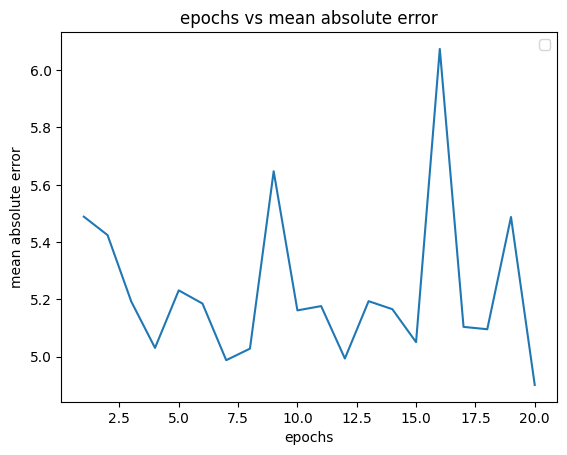

In [28]:
# plotting the number of epochs against the mean absolute errors

plt.plot(np.arange(1, 21), predictions_accuracy)
plt.title('epochs vs mean absolute error')
plt.xlabel('epochs')
plt.ylabel('mean absolute error')
plt.legend()
plt.show()

## This shows that the best epochs that yields the smallest mean absolute error in a range of 1-21 epochs is 20, yielding a value of +- 4.90 mpa


## Visualizing the most minimal Mean Absolute Errors from the various algorithms

In [4]:
models = ['LR', 'DT', 'XGBOOST', 'CATBOOST', 'ANN']
accuracy = [7.75, 4.29, 3, 2.72, 4.90]


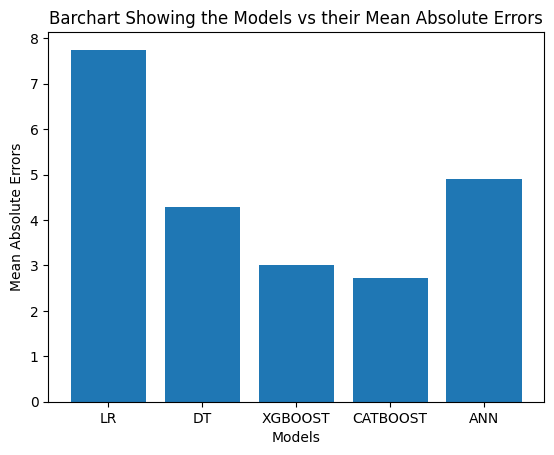

In [10]:
plt.bar(models, accuracy)
plt.ylabel('Mean Absolute Errors')
plt.xlabel('Models')
plt.title('Barchart Showing the Models vs their Mean Absolute Errors')
plt.show()